In [1]:
# 데이터 분석 패키지
import pandas as pd

# 행렬 연산 패키지
import numpy as np

# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt

#데이터 시각화(추세 등) 패키지
import seaborn as sns

# 가설검정 및 통계분석 패키지
from scipy import stats

# 회귀분석
from statsmodels.formula.api import ols

# ANOVA 분석 패키지
from statsmodels.stats.anova import anova_lm

# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant

# 선형모델 formula
import statsmodels.formula.api as smf

# 평가함수
from statsmodels.tools.eval_measures import rmse

# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 학습용/평가용 데이터 분리 : train test
from sklearn.model_selection import train_test_split

# 선형 회귀 모형
from sklearn.linear_model import LinearRegression

# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE

#Scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler

# 평가함수
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score

# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 예측/회귀
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier


# export_graphviz : 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz

# graphiz : 나무 구조 시각화 (.dot 확장자 파일 불러오기 등)
import graphviz

from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor as GBR

# 로지스틱 회귀
from statsmodels.api import Logit

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

#평가함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# SMOTE
from imblearn.over_sampling import SMOTE

# 분류 NN (MLPClassifier)
from sklearn.neural_network import MLPClassifier

# 한글 폰트 적용
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 데이터 구성 및 전처리

In [2]:
# 데이터 구성하기
df_raw = pd.read_csv('/content/sample_data/SCALE불량.csv', encoding='euc-kr')
df_raw

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2021-08-01:08:00:01,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1125,934,적용,8,2조
1,PB562775,2021-08-01:08:07:11,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1120,937,적용,8,2조
2,PB562776,2021-08-01:08:14:21,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1106,889,적용,8,3조
3,PB562777,2021-08-01:08:21:31,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1113,885,적용,8,3조
4,PB562778,2021-08-01:08:28:41,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1118,873,적용,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,PB563502,2021-08-04:21:24:11,불량,NK-KA,C0,20.14,3580,38639,21870,3호기,...,1172,72,1164,62,245,1155,1005,적용,8,2조
716,PB563503,2021-08-04:21:31:21,양품,NV-A32,C0,15.08,3212,48233,18340,2호기,...,1150,61,1169,61,238,1160,947,적용,10,1조
717,PB563504,2021-08-04:21:38:31,양품,NV-A32,C0,16.60,3441,43688,19590,2호기,...,1169,65,1163,77,247,1152,948,적용,10,4조
718,PB563505,2021-08-04:21:45:41,양품,LR-A,C0,15.59,3363,48740,80240,3호기,...,1179,86,1163,45,243,1154,940,적용,10,2조


In [3]:
# 데이터 속성 확인
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PLATE_NO           720 non-null    object 
 1   ROLLING_DATE       720 non-null    object 
 2   SCALE              720 non-null    object 
 3   SPEC               720 non-null    object 
 4   STEEL_KIND         720 non-null    object 
 5   PT_THICK           720 non-null    float64
 6   PT_WIDTH           720 non-null    int64  
 7   PT_LENGTH          720 non-null    int64  
 8   PT_WEIGHT          720 non-null    int64  
 9   FUR_NO             720 non-null    object 
 10  FUR_NO_ROW         720 non-null    object 
 11  FUR_HZ_TEMP        720 non-null    int64  
 12  FUR_HZ_TIME        720 non-null    int64  
 13  FUR_SZ_TEMP        720 non-null    int64  
 14  FUR_SZ_TIME        720 non-null    int64  
 15  FUR_TIME           720 non-null    int64  
 16  FUR_EXTEMP         720 non

In [4]:
# 데이터 행, 열 갯수 확인
df_raw.shape

(720, 21)

In [5]:
# 변수 타입 파악
df_raw.dtypes

PLATE_NO              object
ROLLING_DATE          object
SCALE                 object
SPEC                  object
STEEL_KIND            object
PT_THICK             float64
PT_WIDTH               int64
PT_LENGTH              int64
PT_WEIGHT              int64
FUR_NO                object
FUR_NO_ROW            object
FUR_HZ_TEMP            int64
FUR_HZ_TIME            int64
FUR_SZ_TEMP            int64
FUR_SZ_TIME            int64
FUR_TIME               int64
FUR_EXTEMP             int64
ROLLING_TEMP_T5        int64
HSB                   object
ROLLING_DESCALING      int64
WORK_GR               object
dtype: object

In [6]:
# 데이터 구성하기 - 결측치 처리
df_raw.isnull().sum()

PLATE_NO             0
ROLLING_DATE         0
SCALE                0
SPEC                 0
STEEL_KIND           0
PT_THICK             0
PT_WIDTH             0
PT_LENGTH            0
PT_WEIGHT            0
FUR_NO               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
HSB                  0
ROLLING_DESCALING    0
WORK_GR              0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f98a6382650>,
      dtype=object)

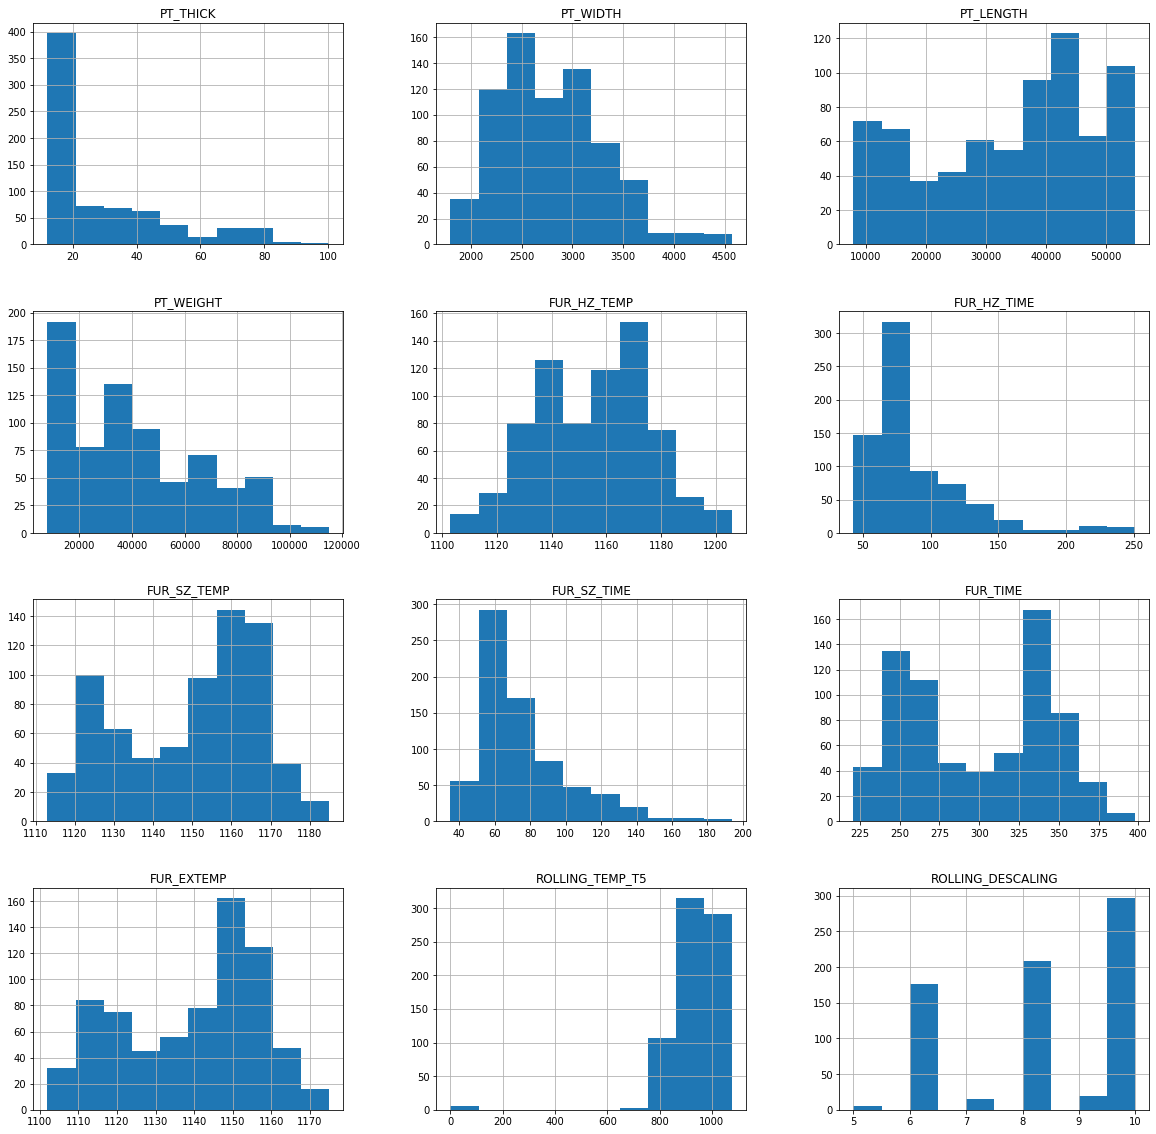

In [7]:
# 전체적인 데이터의 히스토그램
df_raw.hist(figsize = (20,20))

In [8]:
# 데이터 통계량 파악
df_raw.describe()

,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,29.267857,2807.127778,34323.269444,41481.777778,1155.338889,88.204167,1149.666667,75.330556,300.563889,1139.570833,933.920833,8.319444
std,19.152651,517.839690,13828.434837,24751.322015,20.866398,36.248696,17.571788,26.086390,45.390303,17.857121,107.863887,1.623252
min,12.030000,1800.000000,7893.000000,7820.000000,1103.000000,43.000000,1113.000000,35.000000,221.000000,1102.000000,0.000000,5.000000
25%,16.090000,2466.000000,22663.000000,17757.500000,1139.000000,65.000000,1132.000000,57.750000,257.000000,1122.750000,889.750000,6.000000
50%,20.130000,2725.000000,37380.000000,36120.000000,1158.000000,75.000000,1155.000000,67.500000,304.000000,1144.000000,951.000000,8.000000
75%,40.000000,3125.000000,43735.000000,61120.000000,1171.000000,101.000000,1164.000000,85.250000,342.000000,1154.000000,994.250000,10.000000
max,100.340000,4575.000000,54917.000000,115080.000000,1206.000000,251.000000,1185.000000,194.000000,398.000000,1175.000000,1078.000000,10.000000


In [9]:
# 산점도 행렬 출력
sns.pairplot(df_raw)

Output hidden; open in https://colab.research.google.com to view.

### 범주형 변수 처리
### SCALE, SPEC, STEEL_KIND, FUR_NO, FUR_NO_ROW, HSB, WORK_GR

#### SCALE

In [10]:
# SCALE 에서 '양품'이면 0, '불량' 이면 1로 데이터 변환
df_raw['SCALE'].replace({'양품':0, '불량':1}, inplace=True)

In [11]:
# SCALE 변환 결과 간략히 확인
df_raw['SCALE']

0      0
1      0
2      0
3      0
4      0
      ..
715    1
716    0
717    0
718    0
719    0
Name: SCALE, Length: 720, dtype: int64

#### SPEC

In [12]:
# SPEC은 앞 쪽 영문 2글자만 추출하여 새로운 SPEC_SIMPLE 변수 생성
# SPEC 간략히 확인
df_raw['SPEC']

0      AB/EH32-TM
1      AB/EH32-TM
2       NV-E36-TM
3       NV-E36-TM
4      BV-EH36-TM
          ...    
715         NK-KA
716        NV-A32
717        NV-A32
718          LR-A
719        GL-A32
Name: SPEC, Length: 720, dtype: object

In [13]:
# SPEC 의 앞 쪽 영문 2글자 추출
df_raw['SPEC'].str[:2]

0      AB
1      AB
2      NV
3      NV
4      BV
       ..
715    NK
716    NV
717    NV
718    LR
719    GL
Name: SPEC, Length: 720, dtype: object

In [14]:
# SPEC_SIMPLE 변수에 저장
df_raw['SPEC_SIMPLE'] = df_raw['SPEC'].str[:2]
df_raw

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,...,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR,SPEC_SIMPLE
0,PB562774,2021-08-01:08:00:01,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,116,1133,59,282,1125,934,적용,8,2조,AB
1,PB562775,2021-08-01:08:07:11,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,122,1135,53,283,1120,937,적용,8,2조,AB
2,PB562776,2021-08-01:08:14:21,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,116,1121,55,282,1106,889,적용,8,3조,NV
3,PB562777,2021-08-01:08:21:31,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,125,1127,68,316,1113,885,적용,8,3조,NV
4,PB562778,2021-08-01:08:28:41,0,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,134,1128,48,314,1118,873,적용,8,1조,BV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,PB563502,2021-08-04:21:24:11,1,NK-KA,C0,20.14,3580,38639,21870,3호기,...,72,1164,62,245,1155,1005,적용,8,2조,NK
716,PB563503,2021-08-04:21:31:21,0,NV-A32,C0,15.08,3212,48233,18340,2호기,...,61,1169,61,238,1160,947,적용,10,1조,NV
717,PB563504,2021-08-04:21:38:31,0,NV-A32,C0,16.60,3441,43688,19590,2호기,...,65,1163,77,247,1152,948,적용,10,4조,NV
718,PB563505,2021-08-04:21:45:41,0,LR-A,C0,15.59,3363,48740,80240,3호기,...,86,1163,45,243,1154,940,적용,10,2조,LR


#### STEEL_KIND

In [15]:
# STEEL_KIND는 강종으로 이미 분류하기 편한 상태이므로 따로 처리하지 않는다.
df_raw['STEEL_KIND']

0      T1
1      T1
2      T8
3      T8
4      T8
       ..
715    C0
716    C0
717    C0
718    C0
719    C0
Name: STEEL_KIND, Length: 720, dtype: object

#### FUR_NO

In [16]:
# FUR_NO는 가열로 호기로, 이를 1,2,3 과 같은 int 형태로 바꾼다면 분석값에 혼란을 끼칠수 있으므로 따로 처리하지 않는다.
df_raw['FUR_NO']

0      1호기
1      1호기
2      2호기
3      2호기
4      3호기
      ... 
715    3호기
716    2호기
717    2호기
718    3호기
719    3호기
Name: FUR_NO, Length: 720, dtype: object

#### FUR_NO_ROW

In [17]:
# FUR_NO_ROW는 가열로 작업순번으로, 이를 1,2,3 과 같은 int 형태로 바꾼다면 분석값에 혼란을 끼칠수 있으므로 따로 처리하지 않는다.
df_raw['FUR_NO_ROW']

0      1열
1      2열
2      1열
3      2열
4      1열
       ..
715    1열
716    1열
717    2열
718    2열
719    1열
Name: FUR_NO_ROW, Length: 720, dtype: object

#### HSB

In [18]:
# HSB는 Hot Scale Breaker으로 '미적용'이면 0, '적용' 이면 1로 데이터 변환
df_raw['HSB'].replace({'미적용':0, '적용':1}, inplace=True)

In [19]:
# HSB 변환 결과 간략히 확인
df_raw['HSB']

0      1
1      1
2      1
3      1
4      1
      ..
715    1
716    1
717    1
718    1
719    1
Name: HSB, Length: 720, dtype: int64

#### WORK_GR

In [20]:
# WORK_GR은 작업조 이며, 이를 1,2,3 과 같은 int 형태로 바꾼다면 분석값에 혼란을 끼칠수 있으므로 따로 처리하지 않는다.
df_raw['WORK_GR']

0      2조
1      2조
2      3조
3      3조
4      1조
       ..
715    2조
716    1조
717    4조
718    2조
719    2조
Name: WORK_GR, Length: 720, dtype: object

#### 범주형 데이터 처리 결과

In [21]:
df_raw

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,...,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR,SPEC_SIMPLE
0,PB562774,2021-08-01:08:00:01,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,116,1133,59,282,1125,934,1,8,2조,AB
1,PB562775,2021-08-01:08:07:11,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,122,1135,53,283,1120,937,1,8,2조,AB
2,PB562776,2021-08-01:08:14:21,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,116,1121,55,282,1106,889,1,8,3조,NV
3,PB562777,2021-08-01:08:21:31,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,125,1127,68,316,1113,885,1,8,3조,NV
4,PB562778,2021-08-01:08:28:41,0,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,134,1128,48,314,1118,873,1,8,1조,BV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,PB563502,2021-08-04:21:24:11,1,NK-KA,C0,20.14,3580,38639,21870,3호기,...,72,1164,62,245,1155,1005,1,8,2조,NK
716,PB563503,2021-08-04:21:31:21,0,NV-A32,C0,15.08,3212,48233,18340,2호기,...,61,1169,61,238,1160,947,1,10,1조,NV
717,PB563504,2021-08-04:21:38:31,0,NV-A32,C0,16.60,3441,43688,19590,2호기,...,65,1163,77,247,1152,948,1,10,4조,NV
718,PB563505,2021-08-04:21:45:41,0,LR-A,C0,15.59,3363,48740,80240,3호기,...,86,1163,45,243,1154,940,1,10,2조,LR


### 이상치 제거

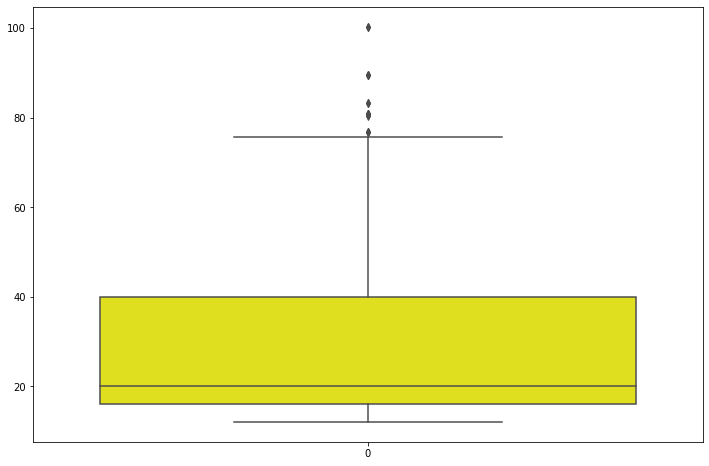

In [22]:
# 이상치 제거
plt.figure(figsize=(12,8))
sns.boxplot(data=df_raw['PT_THICK'], color='yellow')
plt.show()

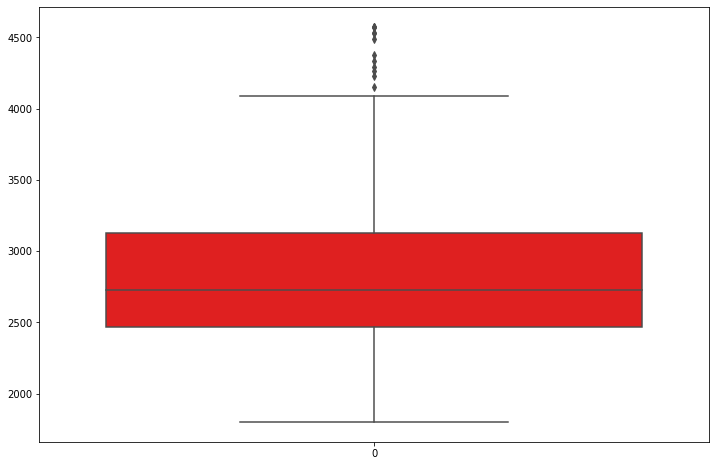

In [23]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df_raw['PT_WIDTH'], color='red')
plt.show()

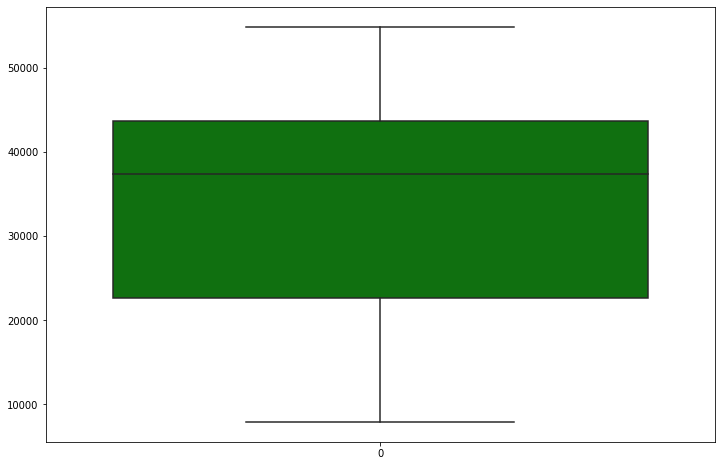

In [24]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df_raw['PT_LENGTH'], color='green')
plt.show()

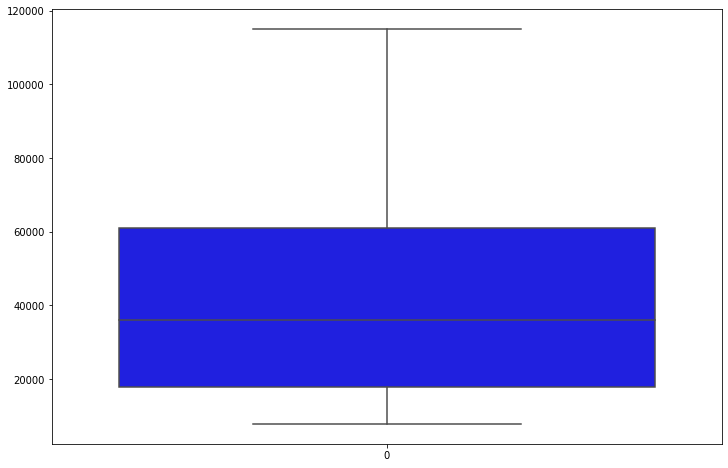

In [25]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df_raw['PT_WEIGHT'], color='blue')
plt.show()

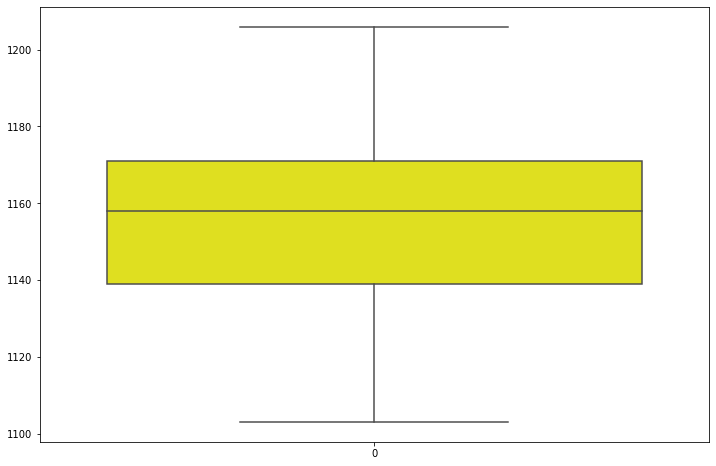

In [26]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df_raw['FUR_HZ_TEMP'], color='yellow')
plt.show()

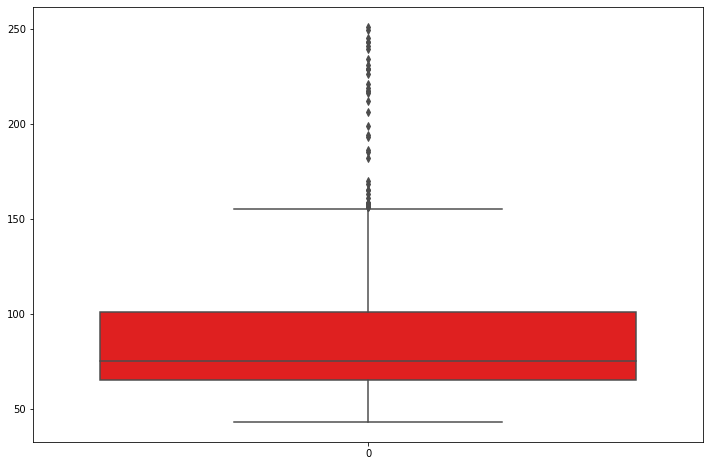

In [27]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df_raw['FUR_HZ_TIME'], color='red')
plt.show()

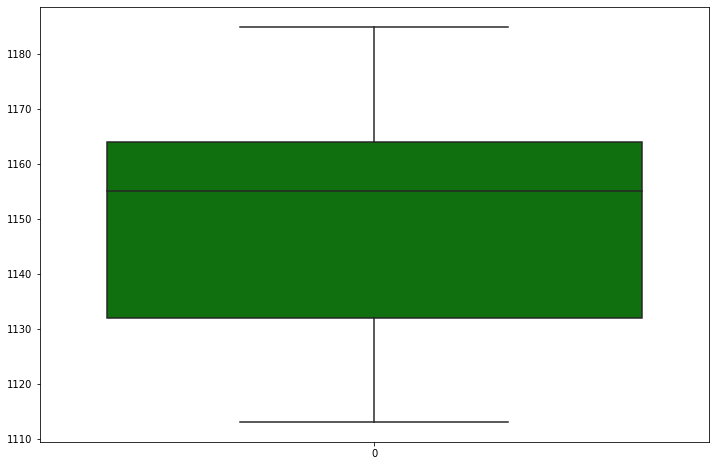

In [28]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df_raw['FUR_SZ_TEMP'], color='green')
plt.show()

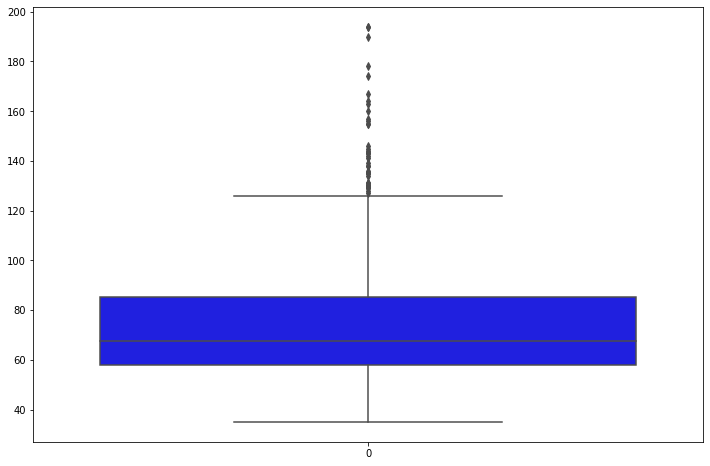

In [29]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df_raw['FUR_SZ_TIME'], color='blue')
plt.show()

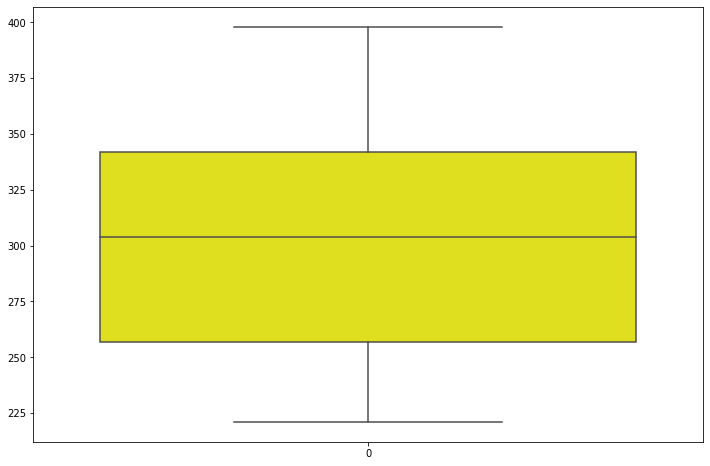

In [30]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df_raw['FUR_TIME'], color='yellow')
plt.show()

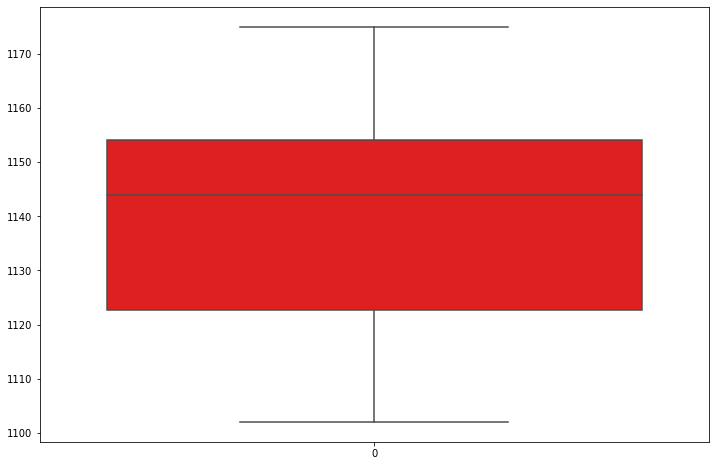

In [31]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df_raw['FUR_EXTEMP'], color='red')
plt.show()

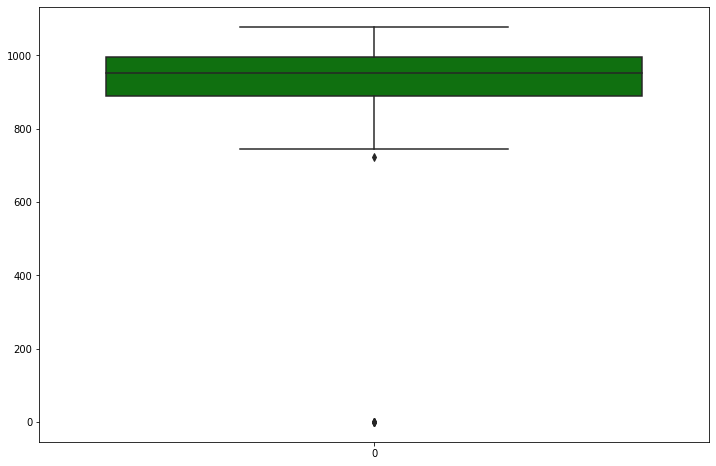

In [32]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df_raw['ROLLING_TEMP_T5'], color='green')
plt.show()

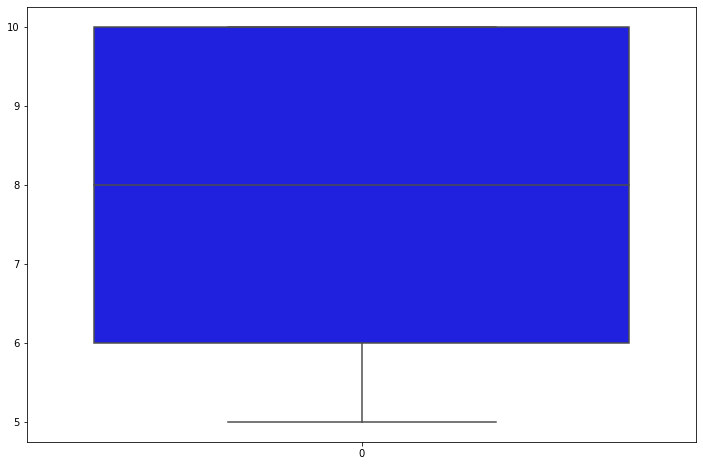

In [33]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df_raw['ROLLING_DESCALING'], color='blue')
plt.show()

In [34]:
# 이상치 제거 
def del_outlier(df,col,w):
    q_1 = df[col].quantile(0.25)
    q_3 = df[col].quantile(0.75)
    IQR = q_3 - q_1
    lower = q_1 - w * IQR
    upper = q_3 + w * IQR
    df[col] = df[col][df[col]>=lower]
    df[col] = df[col][df[col]<=upper]

In [35]:
# [PT_THICK, PT_WIDTH, FUR_HZ_TIME, FUR_SZ_TIME, ROLLING_TEMP_T5]의 이상치 제거
outlier_list=['PT_THICK', 'PT_WIDTH', 'FUR_HZ_TIME', 'FUR_SZ_TIME', 'ROLLING_TEMP_T5']

for i in outlier_list:
    del_outlier(df_raw ,i, 1.5)

In [36]:
df_raw.isnull().sum()
# 이상치 제거
df_raw.dropna(inplace=True)
df_raw

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,...,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR,SPEC_SIMPLE
0,PB562774,2021-08-01:08:00:01,0,AB/EH32-TM,T1,32.25,3707.0,15109,14180,1호기,...,116.0,1133,59.0,282,1125,934.0,1,8,2조,AB
1,PB562775,2021-08-01:08:07:11,0,AB/EH32-TM,T1,32.25,3707.0,15109,14180,1호기,...,122.0,1135,53.0,283,1120,937.0,1,8,2조,AB
2,PB562776,2021-08-01:08:14:21,0,NV-E36-TM,T8,33.27,3619.0,19181,18130,2호기,...,116.0,1121,55.0,282,1106,889.0,1,8,3조,NV
3,PB562777,2021-08-01:08:21:31,0,NV-E36-TM,T8,33.27,3619.0,19181,18130,2호기,...,125.0,1127,68.0,316,1113,885.0,1,8,3조,NV
4,PB562778,2021-08-01:08:28:41,0,BV-EH36-TM,T8,38.33,3098.0,13334,12430,3호기,...,134.0,1128,48.0,314,1118,873.0,1,8,1조,BV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,PB563502,2021-08-04:21:24:11,1,NK-KA,C0,20.14,3580.0,38639,21870,3호기,...,72.0,1164,62.0,245,1155,1005.0,1,8,2조,NK
716,PB563503,2021-08-04:21:31:21,0,NV-A32,C0,15.08,3212.0,48233,18340,2호기,...,61.0,1169,61.0,238,1160,947.0,1,10,1조,NV
717,PB563504,2021-08-04:21:38:31,0,NV-A32,C0,16.60,3441.0,43688,19590,2호기,...,65.0,1163,77.0,247,1152,948.0,1,10,4조,NV
718,PB563505,2021-08-04:21:45:41,0,LR-A,C0,15.59,3363.0,48740,80240,3호기,...,86.0,1163,45.0,243,1154,940.0,1,10,2조,LR


### Heatmap를 통한 탐색적 분석

In [37]:
# PLATE_NO, ROLLING DATE, SPEC, WORK_GR가 없는 Heatmap 출력을 위해 df_raw_main 생성
df_raw = df_raw.loc[:, ['SCALE','STEEL_KIND','PT_THICK','PT_WIDTH','PT_LENGTH','PT_WEIGHT', 'FUR_NO','FUR_NO_ROW','FUR_HZ_TEMP','FUR_HZ_TIME','FUR_SZ_TEMP', 'FUR_SZ_TIME', 'FUR_TIME', 'FUR_EXTEMP', 'ROLLING_TEMP_T5', 'HSB', 'ROLLING_DESCALING', 'SPEC_SIMPLE']]
df_raw

,SCALE,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,SPEC_SIMPLE
0,0,T1,32.25,3707.0,15109,14180,1호기,1열,1144,116.0,1133,59.0,282,1125,934.0,1,8,AB
1,0,T1,32.25,3707.0,15109,14180,1호기,2열,1144,122.0,1135,53.0,283,1120,937.0,1,8,AB
2,0,T8,33.27,3619.0,19181,18130,2호기,1열,1129,116.0,1121,55.0,282,1106,889.0,1,8,NV
3,0,T8,33.27,3619.0,19181,18130,2호기,2열,1152,125.0,1127,68.0,316,1113,885.0,1,8,NV
4,0,T8,38.33,3098.0,13334,12430,3호기,1열,1140,134.0,1128,48.0,314,1118,873.0,1,8,BV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,1,C0,20.14,3580.0,38639,21870,3호기,1열,1172,72.0,1164,62.0,245,1155,1005.0,1,8,NK
716,0,C0,15.08,3212.0,48233,18340,2호기,1열,1150,61.0,1169,61.0,238,1160,947.0,1,10,NV
717,0,C0,16.60,3441.0,43688,19590,2호기,2열,1169,65.0,1163,77.0,247,1152,948.0,1,10,NV
718,0,C0,15.59,3363.0,48740,80240,3호기,2열,1179,86.0,1163,45.0,243,1154,940.0,1,10,LR


In [38]:
# Dummy 함수 사용
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy

,SCALE,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,...,SPEC_SIMPLE_GL,SPEC_SIMPLE_JS,SPEC_SIMPLE_KR,SPEC_SIMPLE_KS,SPEC_SIMPLE_LR,SPEC_SIMPLE_NK,SPEC_SIMPLE_NV,SPEC_SIMPLE_PI,SPEC_SIMPLE_SA,SPEC_SIMPLE_V4
0,0,32.25,3707.0,15109,14180,1144,116.0,1133,59.0,282,...,0,0,0,0,0,0,0,0,0,0
1,0,32.25,3707.0,15109,14180,1144,122.0,1135,53.0,283,...,0,0,0,0,0,0,0,0,0,0
2,0,33.27,3619.0,19181,18130,1129,116.0,1121,55.0,282,...,0,0,0,0,0,0,1,0,0,0
3,0,33.27,3619.0,19181,18130,1152,125.0,1127,68.0,316,...,0,0,0,0,0,0,1,0,0,0
4,0,38.33,3098.0,13334,12430,1140,134.0,1128,48.0,314,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,1,20.14,3580.0,38639,21870,1172,72.0,1164,62.0,245,...,0,0,0,0,0,1,0,0,0,0
716,0,15.08,3212.0,48233,18340,1150,61.0,1169,61.0,238,...,0,0,0,0,0,0,1,0,0,0
717,0,16.60,3441.0,43688,19590,1169,65.0,1163,77.0,247,...,0,0,0,0,0,0,1,0,0,0
718,0,15.59,3363.0,48740,80240,1179,86.0,1163,45.0,243,...,0,0,0,0,1,0,0,0,0,0


In [39]:
# Normalizer 적용
from sklearn.preprocessing import Normalizer

In [40]:
# Scale 변환 : Normalizer scaler (평균, 표준편차 적용)
df_scale_normal = Normalizer()
df_scale_normal = df_scale_normal.fit_transform(df_raw_dummy)
df_scale_normal

array([[0.00000000e+00, 1.52379836e-03, 1.75154124e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.52379794e-03, 1.75154076e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.24479615e-03, 1.35404787e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 3.45438762e-04, 7.16057097e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.65903816e-04, 3.57879753e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.81800476e-04, 3.84165082e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [41]:
# Dataframe으로 변환
df_scale_normal = pd.DataFrame(df_scale_normal, columns = df_raw_dummy.columns)
df_scale_normal

,SCALE,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,...,SPEC_SIMPLE_GL,SPEC_SIMPLE_JS,SPEC_SIMPLE_KR,SPEC_SIMPLE_KS,SPEC_SIMPLE_LR,SPEC_SIMPLE_NK,SPEC_SIMPLE_NV,SPEC_SIMPLE_PI,SPEC_SIMPLE_SA,SPEC_SIMPLE_V4
0,0.000000,0.001524,0.175154,0.713894,0.669999,0.054053,0.005481,0.053534,0.002788,0.013324,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,0.000000,0.001524,0.175154,0.713893,0.669999,0.054053,0.005764,0.053628,0.002504,0.013372,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,0.000000,0.001245,0.135405,0.717657,0.678333,0.042242,0.004340,0.041942,0.002058,0.010551,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000037,0.0,0.0,0.0
3,0.000000,0.001245,0.135395,0.717607,0.678287,0.043099,0.004677,0.042164,0.002544,0.011822,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000037,0.0,0.0,0.0
4,0.000000,0.002059,0.166405,0.716217,0.667660,0.061233,0.007198,0.060589,0.002578,0.016866,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,0.000022,0.000452,0.080268,0.866331,0.490350,0.026278,0.001614,0.026098,0.001390,0.005493,...,0.000000,0.0,0.0,0.0,0.000000,0.000022,0.000000,0.0,0.0,0.0
605,0.000000,0.000291,0.062067,0.932034,0.354394,0.022222,0.001179,0.022589,0.001179,0.004599,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000019,0.0,0.0,0.0
606,0.000000,0.000345,0.071606,0.909128,0.407659,0.024326,0.001353,0.024202,0.001602,0.005140,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000021,0.0,0.0,0.0
607,0.000000,0.000166,0.035788,0.518676,0.853889,0.012547,0.000915,0.012376,0.000479,0.002586,...,0.000000,0.0,0.0,0.0,0.000011,0.000000,0.000000,0.0,0.0,0.0


In [42]:
# Scale 변환 결과값을 Descrie를 통해 확인 
df_scale_desc = df_scale_normal.describe()
df_scale_desc.round(10)

,SCALE,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,...,SPEC_SIMPLE_GL,SPEC_SIMPLE_JS,SPEC_SIMPLE_KR,SPEC_SIMPLE_KS,SPEC_SIMPLE_LR,SPEC_SIMPLE_NK,SPEC_SIMPLE_NV,SPEC_SIMPLE_PI,SPEC_SIMPLE_SA,SPEC_SIMPLE_V4
count,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,...,609.000000,609.000000,6.090000e+02,6.090000e+02,609.000000,6.090000e+02,609.000000,609.000000,6.090000e+02,6.090000e+02
mean,0.000006,0.000787,0.061976,0.643986,0.718537,0.025657,0.001894,0.025505,0.001650,0.006710,...,0.000002,0.000003,5.592000e-07,6.418000e-07,0.000003,5.160000e-07,0.000003,0.000002,4.497000e-07,9.540000e-08
std,0.000009,0.000983,0.036889,0.168772,0.179554,0.014340,0.001493,0.014173,0.001211,0.004443,...,0.000008,0.000006,2.919600e-06,3.558900e-06,0.000007,2.959700e-06,0.000008,0.000009,2.405000e-06,1.179700e-06
min,0.000000,0.000132,0.022011,0.272817,0.211609,0.009571,0.000507,0.009554,0.000433,0.002295,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,0.000000,0.000231,0.037148,0.515062,0.658973,0.015693,0.000999,0.015638,0.000868,0.003889,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
50%,0.000000,0.000326,0.048573,0.622236,0.778610,0.021160,0.001302,0.021008,0.001160,0.005062,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
75%,0.000012,0.000835,0.072479,0.750281,0.855547,0.028108,0.002116,0.028002,0.001985,0.007229,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
max,0.000059,0.004769,0.209328,0.973455,0.958977,0.074416,0.009526,0.071795,0.006265,0.024688,...,0.000061,0.000031,1.933630e-05,2.942800e-05,0.000060,2.490070e-05,0.000048,0.000064,1.932730e-05,1.683480e-05


In [43]:
#  Scale 변환 결과값의 전체 상관관계 분석
df_scale_normal.corr().round(3)

,SCALE,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,...,SPEC_SIMPLE_GL,SPEC_SIMPLE_JS,SPEC_SIMPLE_KR,SPEC_SIMPLE_KS,SPEC_SIMPLE_LR,SPEC_SIMPLE_NK,SPEC_SIMPLE_NV,SPEC_SIMPLE_PI,SPEC_SIMPLE_SA,SPEC_SIMPLE_V4
SCALE,1.000,-0.101,-0.136,0.013,0.011,-0.088,-0.099,-0.087,-0.144,-0.102,...,-0.025,0.285,0.081,0.142,-0.036,-0.022,0.009,-0.081,0.017,-0.022
PT_THICK,-0.101,1.000,0.811,-0.112,0.135,0.917,0.884,0.919,0.858,0.949,...,0.292,-0.195,-0.091,-0.039,-0.068,-0.091,-0.047,0.435,-0.097,-0.026
PT_WIDTH,-0.136,0.811,1.000,0.162,-0.128,0.944,0.812,0.944,0.853,0.879,...,0.161,-0.293,-0.112,-0.059,0.104,-0.048,0.092,0.221,-0.136,-0.065
PT_LENGTH,0.013,-0.112,0.162,1.000,-0.964,0.165,0.047,0.163,0.092,0.079,...,-0.074,-0.244,-0.002,-0.012,0.252,0.156,0.357,-0.024,-0.211,-0.062
PT_WEIGHT,0.011,0.135,-0.128,-0.964,1.000,-0.122,-0.017,-0.120,-0.054,-0.045,...,0.059,0.260,0.019,0.023,-0.241,-0.176,-0.389,0.048,0.177,0.062
FUR_HZ_TEMP,-0.088,0.917,0.944,0.165,-0.122,1.000,0.895,1.000,0.918,0.971,...,0.217,-0.246,-0.099,-0.028,0.014,-0.063,0.051,0.359,-0.132,-0.049
FUR_HZ_TIME,-0.099,0.884,0.812,0.047,-0.017,0.895,1.000,0.893,0.801,0.926,...,0.141,-0.207,-0.089,-0.047,-0.030,-0.073,0.016,0.554,-0.122,-0.043
FUR_SZ_TEMP,-0.087,0.919,0.944,0.163,-0.120,1.000,0.893,1.000,0.916,0.971,...,0.217,-0.243,-0.098,-0.027,0.016,-0.064,0.048,0.354,-0.133,-0.049
FUR_SZ_TIME,-0.144,0.858,0.853,0.092,-0.054,0.918,0.801,0.916,1.000,0.925,...,0.269,-0.227,-0.099,-0.047,-0.043,-0.075,0.035,0.368,-0.126,-0.048
FUR_TIME,-0.102,0.949,0.879,0.079,-0.045,0.971,0.926,0.971,0.925,1.000,...,0.212,-0.228,-0.096,-0.025,-0.021,-0.080,0.015,0.443,-0.118,-0.045


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50676 missing from current font.
  font.set_text

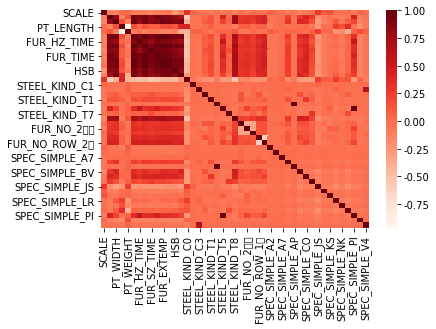

In [44]:
#  Scale 변환 결과값의 Heatmap 출력
sns.heatmap(df_scale_normal.corr(), cmap="Reds")

## Random Forest

In [45]:
## using graphviz 
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot
## colab graphviz 설치
!apt-get install graphviz libgraphviz-dev pkg-config
!pip install pygraphviz
import pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 20 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bio

In [46]:
# 데이터 구성하기 - 데이터 분할
# 설명변수, 목표변수 데이터 구분
df_raw_x = df_raw_dummy.drop('SCALE', axis=1 ,inplace=False)
df_raw_y = df_raw_dummy['SCALE']

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    df_raw_x, df_raw_y, test_size=0.3, random_state=1234)

print('분할 전 설명변수 데이터:', df_raw_x.shape)
print('분할 후 설명변수 데이터:Train', df_train_x.shape, 'Test',df_test_x.shape)

분할 전 설명변수 데이터: (609, 44)
분할 후 설명변수 데이터:Train (426, 44) Test (183, 44)


In [47]:
rf_uncustomized = RandomForestRegressor(random_state= 1234)
rf_uncustomized.fit(df_train_x, df_train_y)
#Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
#Test 데이터 설명력
print("Score on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.974
Score on test set: 0.881


In [48]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# n_estimatios : 트리 수 변경 : 1~100
para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_n = pd.DataFrame()
df_score_n["n_estimaotrs"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

#모델 설명력 확인
df_score_n.round(3)

,n_estimaotrs,TrainScore,TestScore
0,10,0.969,0.863
1,20,0.974,0.872
2,30,0.973,0.871
3,40,0.972,0.876
4,50,0.973,0.877
5,60,0.974,0.879
6,70,0.974,0.876
7,80,0.975,0.880
8,90,0.974,0.877
9,100,0.974,0.881


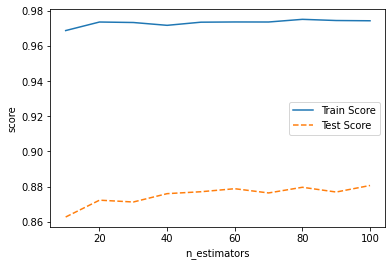

In [49]:
# 모델 설명력에 대한 그래프 확인
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score");plt.xlabel("n_estimators")
plt.legend()

In [50]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# n_estimatios : 트리 수 변경 : 1~100
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(n_estimators = 100, min_samples_leaf = v_min_samples_leaf, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

#모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.974,0.881
1,2,0.954,0.843
2,3,0.953,0.852
3,4,0.946,0.852
4,5,0.938,0.844
5,6,0.930,0.837
6,7,0.923,0.827
7,8,0.916,0.818
8,9,0.903,0.806
9,10,0.878,0.778


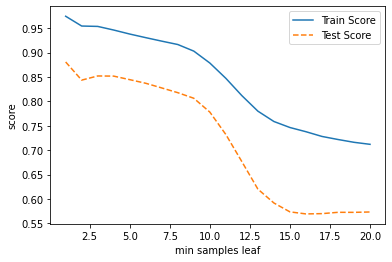

In [51]:
# 모델 설명력에 대한 그래프 확인
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score");plt.xlabel("min samples leaf")
plt.legend()

In [52]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# n_estimatios : 트리 수 변경 : 1~100
para_split = [n_split * 2for n_split in range(2,21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 6, min_samples_split = v_min_samples_split, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))                                                                                                                  
    
# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinsamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

#모델 설명력 확인
df_score_split.round(3)

,MinsamplesSplit,TrainScore,TestScore
0,4,0.930,0.837
1,6,0.930,0.837
2,8,0.930,0.837
3,10,0.930,0.837
4,12,0.930,0.837
5,14,0.929,0.836
6,16,0.927,0.836
7,18,0.925,0.837
8,20,0.923,0.836
9,22,0.920,0.835


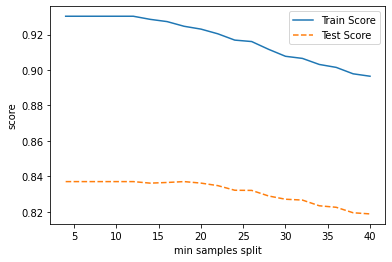

In [53]:
# 모델 설명력에 대한 그래프 확인
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score");plt.xlabel("min samples split")
plt.legend()

In [54]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# n_estimatios : 트리 수 변경 : 1~100
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 6, min_samples_split = 14, max_depth = v_max_depth, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

#모델 설명력 확인
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.579,0.562
1,2,0.781,0.737
2,3,0.855,0.794
3,4,0.863,0.795
4,5,0.888,0.812
5,6,0.918,0.832
6,7,0.927,0.835
7,8,0.929,0.836
8,9,0.929,0.836
9,10,0.929,0.836


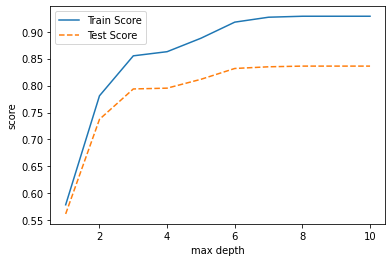

In [55]:
# 모델 설명력에 대한 그래프 확인
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score");plt.xlabel("max depth")
plt.legend()

In [56]:
rf_final = RandomForestRegressor(random_state= 1234, n_estimators = 100, min_samples_leaf = 6, min_samples_split=14, max_depth=4)
rf_final.fit(df_train_x, df_train_y)
#Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
#Test 데이터 설명력
print("Score on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set: 0.863
Score on test set: 0.795


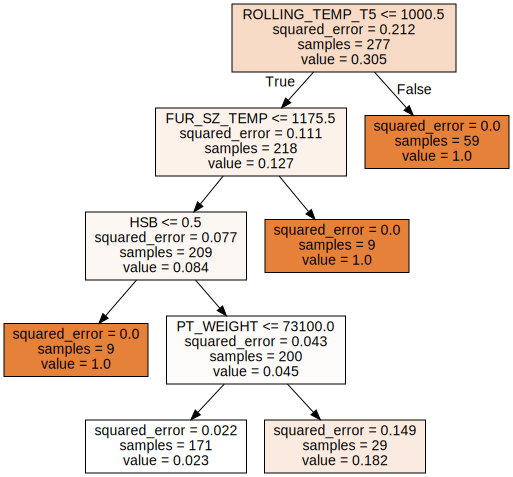

In [57]:
#변수명 저장
v_feature_name = df_train_x.columns

#0번 트리
export_graphviz(rf_final.estimators_[0], out_file="rfr_final_0.dot", feature_names= v_feature_name, impurity = True, filled = True)

#tree_final_0.dot 그리기
with open('rfr_final_0.dot')as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

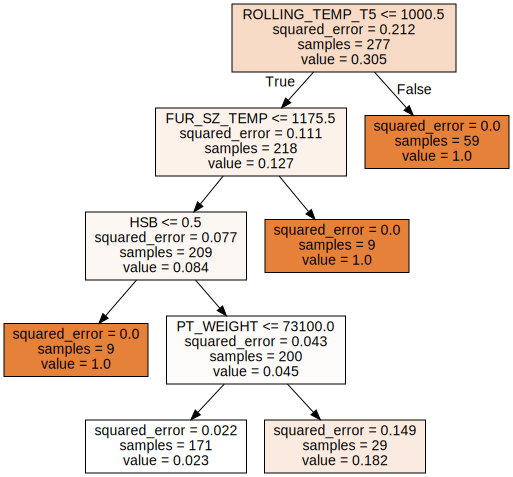

In [58]:
#1번 트리
export_graphviz(rf_final.estimators_[1], out_file="rfr_final_1.dot", feature_names= v_feature_name, impurity = True, filled = True)

#tree_final_1.dot 그리기
with open('rfr_final_1.dot')as f:
    dot_grapth = f.read()
display(graphviz.Source(dot_graph))

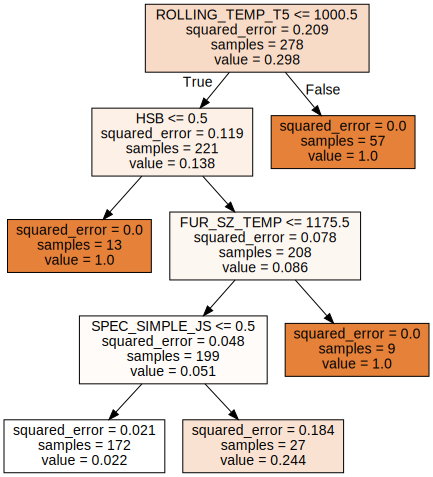

In [59]:
#10번 트리
export_graphviz(rf_final.estimators_[10], out_file="rfr_final_10.dot", feature_names= v_feature_name, impurity = True, filled = True)

#tree_final_10.dot 그리기
with open('rfr_final_10.dot')as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [60]:
# tree.feature_importances_로 설명벼ㄴ수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

#df_feature_importance의 테이브를 중요도 순으로 정렬
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
10,ROLLING_TEMP_T5,0.672
6,FUR_SZ_TEMP,0.156
11,HSB,0.155
3,PT_WEIGHT,0.004
4,FUR_HZ_TEMP,0.004
9,FUR_EXTEMP,0.003
7,FUR_SZ_TIME,0.002
35,SPEC_SIMPLE_JS,0.001
8,FUR_TIME,0.001
5,FUR_HZ_TIME,0.000


Text(0, 0.5, '변수')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_

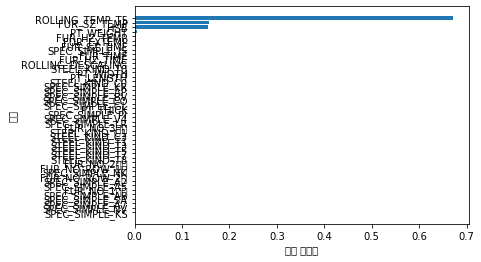

In [61]:
#설명변수 중요도 그래프
#중요도가 높은 변수를 상위에 그림.
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

### 중요 설명변수 : 압연온도(ROLLING_TEMP_T5). 가열로 균열대 시간(FUR_SZ_TEMP), 고열의 스케일 브레이커(HSB) 순으로 영향이 크다고 해석할 수 있음
### 단, 계산된 변수 중요도 값이 낮거나 0이더라도 선택되는 데이터에 따라 중요도가 변경될 수 있음. 

## Gradient Boosting

In [62]:
# 모델 생성 : GradientBoostingRegressor
gb_uncustomized = GradientBoostingRegressor(random_state= 1234)
gb_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set :{:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set: {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))

Score on training set :0.992
Score on test set: 0.965


In [63]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# n_estimatios : 트리 수 변경 : 1~100
para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(n_estimators = v_n_estimators, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_n = pd.DataFrame()
df_score_n["Estimaotrs"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

#모델 설명력 확인
df_score_n.round(3)

,Estimaotrs,TrainScore,TestScore
0,10,0.752,0.706
1,20,0.871,0.837
2,30,0.913,0.878
3,40,0.947,0.927
4,50,0.967,0.942
5,60,0.977,0.951
6,70,0.984,0.958
7,80,0.988,0.962
8,90,0.991,0.965
9,100,0.992,0.965


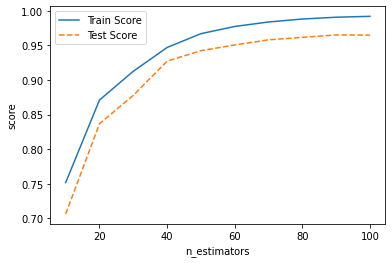

In [64]:
# 모델 설명력에 대한 그래프 확인
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

In [65]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_leaf : 잎사귀 최소 자료 수
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf = GradientBoostingRegressor(random_state=1234, n_estimators =30, 
                                  min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

#모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.913,0.878
1,2,0.911,0.835
2,3,0.920,0.848
3,4,0.918,0.843
4,5,0.914,0.838
5,6,0.910,0.832
6,7,0.904,0.825
7,8,0.905,0.824
8,9,0.902,0.820
9,10,0.904,0.827


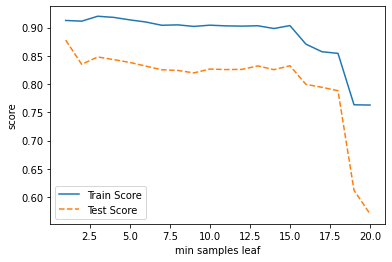

In [66]:
# 모델 설명력에 대한 그래프 확인
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

In [67]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_leaf : 잎사귀 최소 자료 수
para_split = [n_split * 2 for n_split in range(1,21)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators =30, min_samples_leaf = 11, 
                                  min_samples_split=v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesLeaf"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

#모델 설명력 확인
df_score_split.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,2,0.903,0.826
1,4,0.903,0.826
2,6,0.903,0.826
3,8,0.903,0.826
4,10,0.903,0.826
5,12,0.903,0.826
6,14,0.903,0.826
7,16,0.903,0.826
8,18,0.903,0.826
9,20,0.903,0.826


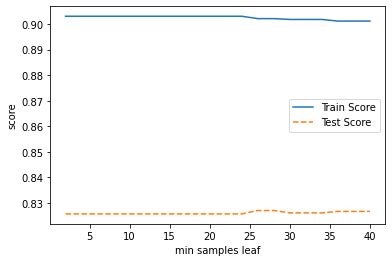

In [68]:
# 모델 설명력에 대한 그래프 확인 : 22개
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score")
plt.xlabel("min samples leaf")
plt.legend()

In [69]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_leaf : 분할하기 위한 노드의 최소 자료 수
para_split = [n_split * 2 for n_split in range(1,21)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators =30, min_samples_leaf = 11, 
                                  min_samples_split=v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesLeaf"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

#모델 설명력 확인
df_score_split.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,2,0.903,0.826
1,4,0.903,0.826
2,6,0.903,0.826
3,8,0.903,0.826
4,10,0.903,0.826
5,12,0.903,0.826
6,14,0.903,0.826
7,16,0.903,0.826
8,18,0.903,0.826
9,20,0.903,0.826


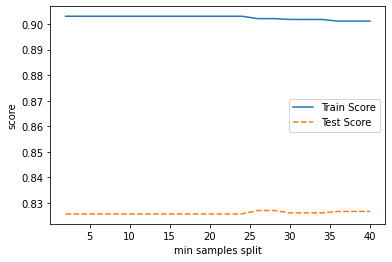

In [70]:
# 모델 설명력에 대한 그래프 확인 : 22개
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score")
plt.xlabel("min samples split")
plt.legend()

In [71]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# max_depth : 최대 깊이 변경
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators =30, min_samples_leaf = 11, 
                         min_samples_split = 22, max_depth=v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

#모델 설명력 확인
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.744,0.696
1,2,0.846,0.778
2,3,0.903,0.826
3,4,0.943,0.875
4,5,0.964,0.899
5,6,0.971,0.898
6,7,0.974,0.891
7,8,0.978,0.891
8,9,0.978,0.888
9,10,0.979,0.888


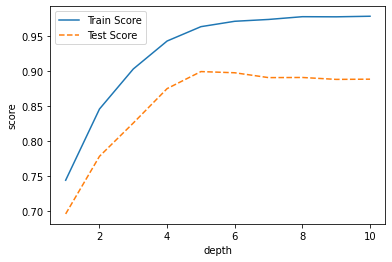

In [72]:
# 모델 설명력에 대한 그래프 확인 : 22개
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score")
plt.xlabel("depth")
plt.legend()

In [73]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# learning rate : 학습률 변경 0.1 ~ 0.9
para_lr = [lr*0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators =30, min_samples_leaf = 11, 
                         min_samples_split = 22, max_depth=4, learning_rate = v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_lr = pd.DataFrame()
df_score_lr["LearningRate"] = para_lr
df_score_lr["TrainScore"] = train_score
df_score_lr["TestScore"] = test_score

#모델 설명력 확인
df_score_lr.round(3)

,LearningRate,TrainScore,TestScore
0,0.1,0.943,0.875
1,0.2,0.972,0.886
2,0.3,0.980,0.896
3,0.4,0.987,0.892
4,0.5,0.990,0.890
5,0.6,0.992,0.879
6,0.7,0.992,0.878
7,0.8,0.995,0.883
8,0.9,0.996,0.886


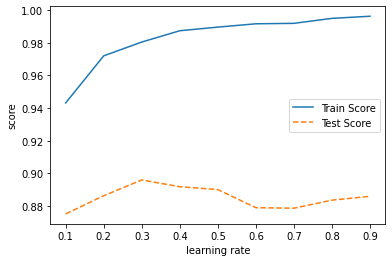

In [74]:
# 모델 설명력에 대한 그래프 확인 : 22개
plt.plot(para_lr, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_lr, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score")
plt.xlabel("learning rate")
plt.legend()

In [75]:
gb_final = GradientBoostingRegressor(min_samples_leaf = 15, n_estimators = 10, min_samples_split = 15, max_depth = 7, learning_rate = 0.5, random_state = 1234)
gb_final.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print('Score on training set: {:.3f}'.format(gb_final.score(df_train_x, df_train_y)))

# Test 데이터 설명력
print('Score on test set: {:.3f}'.format(gb_final.score(df_test_x, df_test_y)))

gb_final

Score on training set: 0.981
Score on test set: 0.866


GradientBoostingRegressor(learning_rate=0.5, max_depth=7, min_samples_leaf=15,
                          min_samples_split=15, n_estimators=10,
                          random_state=1234)

In [76]:
# 변수명 저장
v_feature_name = df_train_x.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = gb_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
10,ROLLING_TEMP_T5,0.596
6,FUR_SZ_TEMP,0.146
11,HSB,0.138
0,PT_THICK,0.065
12,ROLLING_DESCALING,0.022
2,PT_LENGTH,0.008
7,FUR_SZ_TIME,0.007
3,PT_WEIGHT,0.004
8,FUR_TIME,0.003
24,FUR_NO_3호기,0.003


Text(0, 0.5, '변수')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_

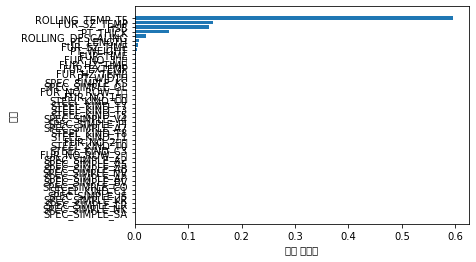

In [77]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

### 중요 설명변수 : 압연온도(ROLLING_TEMP_T5). 가열로 균열대 시간(FUR_SZ_TEMP), 고열의 스케일 브레이커(HSB) 순으로 영향이 크다고 해석할 수 있음
### 단, 계산된 변수 중요도 값이 낮거나 0이더라도 선택되는 데이터에 따라 중요도가 변경될 수 있음. 

## 로지스틱 회귀분석

In [78]:
# 데이터 불러오기
df_raw

,SCALE,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,SPEC_SIMPLE
0,0,T1,32.25,3707.0,15109,14180,1호기,1열,1144,116.0,1133,59.0,282,1125,934.0,1,8,AB
1,0,T1,32.25,3707.0,15109,14180,1호기,2열,1144,122.0,1135,53.0,283,1120,937.0,1,8,AB
2,0,T8,33.27,3619.0,19181,18130,2호기,1열,1129,116.0,1121,55.0,282,1106,889.0,1,8,NV
3,0,T8,33.27,3619.0,19181,18130,2호기,2열,1152,125.0,1127,68.0,316,1113,885.0,1,8,NV
4,0,T8,38.33,3098.0,13334,12430,3호기,1열,1140,134.0,1128,48.0,314,1118,873.0,1,8,BV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,1,C0,20.14,3580.0,38639,21870,3호기,1열,1172,72.0,1164,62.0,245,1155,1005.0,1,8,NK
716,0,C0,15.08,3212.0,48233,18340,2호기,1열,1150,61.0,1169,61.0,238,1160,947.0,1,10,NV
717,0,C0,16.60,3441.0,43688,19590,2호기,2열,1169,65.0,1163,77.0,247,1152,948.0,1,10,NV
718,0,C0,15.59,3363.0,48740,80240,3호기,2열,1179,86.0,1163,45.0,243,1154,940.0,1,10,LR


In [79]:
df_raw.isnull().sum(axis=0)

SCALE                0
STEEL_KIND           0
PT_THICK             0
PT_WIDTH             0
PT_LENGTH            0
PT_WEIGHT            0
FUR_NO               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
HSB                  0
ROLLING_DESCALING    0
SPEC_SIMPLE          0
dtype: int64

In [80]:
df_raw.dtypes

SCALE                  int64
STEEL_KIND            object
PT_THICK             float64
PT_WIDTH             float64
PT_LENGTH              int64
PT_WEIGHT              int64
FUR_NO                object
FUR_NO_ROW            object
FUR_HZ_TEMP            int64
FUR_HZ_TIME          float64
FUR_SZ_TEMP            int64
FUR_SZ_TIME          float64
FUR_TIME               int64
FUR_EXTEMP             int64
ROLLING_TEMP_T5      float64
HSB                    int64
ROLLING_DESCALING      int64
SPEC_SIMPLE           object
dtype: object

In [81]:
df_raw["SCALE"].fillna("Other", inplace = True)
df_raw.fillna(df_raw.mean(), inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [82]:
# train test_split 
df_train, df_test = train_test_split(df_raw, test_size = 0.3, random_state = 1234)

print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (426, 18)
test data size : (183, 18)


In [83]:
# 열을 +로 연결하기 
'+'.join(list(df_raw.columns))

'SCALE+STEEL_KIND+PT_THICK+PT_WIDTH+PT_LENGTH+PT_WEIGHT+FUR_NO+FUR_NO_ROW+FUR_HZ_TEMP+FUR_HZ_TIME+FUR_SZ_TEMP+FUR_SZ_TIME+FUR_TIME+FUR_EXTEMP+ROLLING_TEMP_T5+HSB+ROLLING_DESCALING+SPEC_SIMPLE'

In [84]:
log_model=Logit.from_formula("""SCALE ~ PT_THICK+PT_WIDTH+PT_LENGTH+PT_WEIGHT+FUR_HZ_TEMP+FUR_HZ_TIME+FUR_SZ_TEMP+FUR_SZ_TIME+FUR_TIME+FUR_EXTEMP+ROLLING_TEMP_T5+HSB+ROLLING_DESCALING""", df_train)
log_result = log_model.fit()
print(log_result.summary())

         Current function value: 0.250279
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  426
Model:                          Logit   Df Residuals:                      412
Method:                           MLE   Df Model:                           13
Date:                Wed, 17 Aug 2022   Pseudo R-squ.:                  0.6004
Time:                        20:25:07   Log-Likelihood:                -106.62
converged:                      False   LL-Null:                       -266.80
Covariance Type:            nonrobust   LLR p-value:                 1.299e-60
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -122.9450   7.55e+05     -0.000      1.000   -1.48e+06    1.48e+06
PT_THICK             -0.0005      0.049     

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [85]:
#y_pred_train 설정
y_pred_train = log_result.predict(df_train)
y_pred_train_class = (y_pred_train > 0.5).astype(int)
#y_pred_test 설정
y_pred_test = log_result.predict(df_test)
y_pred_test_class = (y_pred_test > 0.5).astype(int)

In [86]:
print('Train 예측/분류 결과')
print('Accuracy: {0:.3f}\n'.format(accuracy_score(df_train['SCALE'], y_pred_train_class)))
print('Confusion Matrix: \n {}'.format(confusion_matrix(df_train['SCALE'], y_pred_train_class)), '\n')
print(classification_report(df_train['SCALE'], y_pred_train_class, digits=3))

print('test 예측/분류 결과')
print('Accuracy: {0:.3f}\n'.format(accuracy_score(df_test['SCALE'], y_pred_test_class)))
print('Confusion Matrix: \n {}'.format(confusion_matrix(df_test['SCALE'], y_pred_test_class)), '\n')
print(classification_report(df_test['SCALE'], y_pred_test_class, digits=3))

Train 예측/분류 결과
Accuracy: 0.899

Confusion Matrix: 
 [[272  18]
 [ 25 111]] 

              precision    recall  f1-score   support

           0      0.916     0.938     0.927       290
           1      0.860     0.816     0.838       136

    accuracy                          0.899       426
   macro avg      0.888     0.877     0.882       426
weighted avg      0.898     0.899     0.898       426

test 예측/분류 결과
Accuracy: 0.814

Confusion Matrix: 
 [[105  16]
 [ 18  44]] 

              precision    recall  f1-score   support

           0      0.854     0.868     0.861       121
           1      0.733     0.710     0.721        62

    accuracy                          0.814       183
   macro avg      0.793     0.789     0.791       183
weighted avg      0.813     0.814     0.813       183



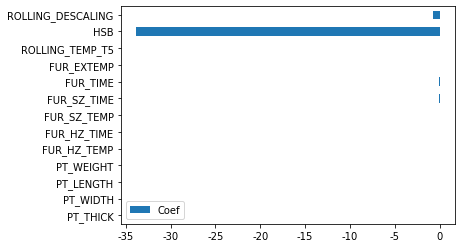

In [87]:
df_logistic_coef = pd.DataFrame({'Coef': log_result.params.values[1:]}, index = log_model.exog_names[1:])
df_logistic_coef.plot.barh(y='Coef');

## KNN

In [88]:
# 데이터 구성 : Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [89]:
df_raw_dummy

,SCALE,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,...,SPEC_SIMPLE_GL,SPEC_SIMPLE_JS,SPEC_SIMPLE_KR,SPEC_SIMPLE_KS,SPEC_SIMPLE_LR,SPEC_SIMPLE_NK,SPEC_SIMPLE_NV,SPEC_SIMPLE_PI,SPEC_SIMPLE_SA,SPEC_SIMPLE_V4
0,0,32.25,3707.0,15109,14180,1144,116.0,1133,59.0,282,...,0,0,0,0,0,0,0,0,0,0
1,0,32.25,3707.0,15109,14180,1144,122.0,1135,53.0,283,...,0,0,0,0,0,0,0,0,0,0
2,0,33.27,3619.0,19181,18130,1129,116.0,1121,55.0,282,...,0,0,0,0,0,0,1,0,0,0
3,0,33.27,3619.0,19181,18130,1152,125.0,1127,68.0,316,...,0,0,0,0,0,0,1,0,0,0
4,0,38.33,3098.0,13334,12430,1140,134.0,1128,48.0,314,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,1,20.14,3580.0,38639,21870,1172,72.0,1164,62.0,245,...,0,0,0,0,0,1,0,0,0,0
716,0,15.08,3212.0,48233,18340,1150,61.0,1169,61.0,238,...,0,0,0,0,0,0,1,0,0,0
717,0,16.60,3441.0,43688,19590,1169,65.0,1163,77.0,247,...,0,0,0,0,0,0,1,0,0,0
718,0,15.59,3363.0,48740,80240,1179,86.0,1163,45.0,243,...,0,0,0,0,1,0,0,0,0,0


In [90]:
# 데이터 구성하기 - 데이터 분할
# 설명변수, 목표변수 데이터 구분
df_raw_x = df_raw_dummy.drop('SCALE', axis=1 ,inplace=False)
df_raw_y = df_raw_dummy['SCALE']

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    df_raw_x, df_raw_y, test_size=0.3, random_state=1234)

print('분할 전 설명변수 데이터:', df_raw_x.shape)
print('분할 후 설명변수 데이터:Train', df_train_x.shape, 'Test',df_test_x.shape)

분할 전 설명변수 데이터: (609, 44)
분할 후 설명변수 데이터:Train (426, 44) Test (183, 44)


In [91]:
knn_uncusotomized = KNeighborsClassifier()
knn_uncusotomized.fit(df_train_x,df_train_y)
print("Accuracy on training set : {:.3f}".format(knn_uncusotomized.score(df_train_x,df_train_y)))
print("Accuracy on test set : {:.3f}".format(knn_uncusotomized.score(df_test_x,df_test_y)))

Accuracy on training set : 0.822
Accuracy on test set : 0.689


In [92]:
train_accuracy = []; test_accuracy = []

para_n_neighbors = [i for i in range(1, 16)]

for v_n_neighbors in para_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors['Neighbors'] = para_n_neighbors
df_accuracy_neighbors['TrainAccuracy'] = train_accuracy
df_accuracy_neighbors['TestAccuracy'] = test_accuracy
df_accuracy_neighbors.round(3)

,Neighbors,TrainAccuracy,TestAccuracy
0,1,1.000,0.721
1,2,0.866,0.716
2,3,0.845,0.699
3,4,0.812,0.743
4,5,0.822,0.689
5,6,0.786,0.683
6,7,0.793,0.672
7,8,0.784,0.656
8,9,0.793,0.661
9,10,0.775,0.634


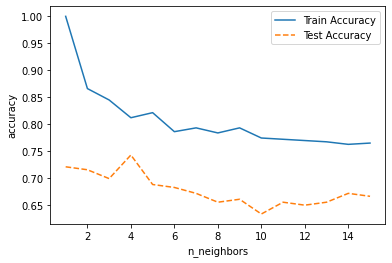

In [93]:
plt.plot(para_n_neighbors, train_accuracy, linestyle="-", label = "Train Accuracy")
plt.plot(para_n_neighbors, test_accuracy, linestyle="--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("n_neighbors")

plt.legend()

In [94]:
train_accuracy = []
test_accuracy = []

para_n_neighbors = [i for i in range(1,11)] *2
#가중치
para_weights = (['uniform'])*10+(['distance']*10)

for (v_n_neighbors,v_weights) in zip(para_n_neighbors,para_weights):
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors,weights=v_weights)
    knn.fit(df_train_x,df_train_y)
    train_accuracy.append(knn.score(df_train_x,df_train_y))
    test_accuracy.append(knn.score(df_test_x,df_test_y))
    
df_accuracy_weights = pd.DataFrame()
df_accuracy_weights['Neighbors']=para_n_neighbors
df_accuracy_weights['Weights']=para_weights
df_accuracy_weights['TrainAccuracy']=train_accuracy
df_accuracy_weights['TestAccuracy']=test_accuracy
df_accuracy_weights.round(3)

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,1,uniform,1.000,0.721
1,2,uniform,0.866,0.716
2,3,uniform,0.845,0.699
3,4,uniform,0.812,0.743
4,5,uniform,0.822,0.689
5,6,uniform,0.786,0.683
6,7,uniform,0.793,0.672
7,8,uniform,0.784,0.656
8,9,uniform,0.793,0.661
9,10,uniform,0.775,0.634


In [95]:
df_accuracy_weights_pivot=df_accuracy_weights.pivot(index="Neighbors",columns="Weights",
                                                    values=['TrainAccuracy','TestAccuracy'])

df_accuracy_weights_pivot


level0=df_accuracy_weights_pivot.columns.get_level_values(0)
level1=df_accuracy_weights_pivot.columns.get_level_values(1)

df_accuracy_weights_pivot.columns=level0+"_"+level1
df_accuracy_weights_pivot.head()

,TrainAccuracy_distance,TrainAccuracy_uniform,TestAccuracy_distance,TestAccuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.721311,0.721311
2,1.0,0.866197,0.721311,0.715847
3,1.0,0.845070,0.721311,0.699454
4,1.0,0.812207,0.726776,0.743169
5,1.0,0.821596,0.721311,0.688525


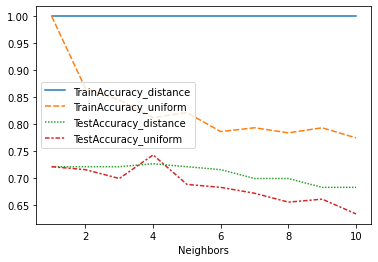

In [96]:
sns.lineplot(data=df_accuracy_weights_pivot)

weights="uniform"

In [97]:
train_accuracy = []; test_accuracy = []
para_n_neighbors = [i for i in range(1,11)] *3
para_metric = ["minkowski"] *10 + ["euclidean"]*10 + ["manhattan"] * 10

for(v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, metric=v_metric, weights = "uniform")
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

df_accuracy_metric = pd.DataFrame()
df_accuracy_metric["Neighbors"] = para_n_neighbors
df_accuracy_metric["Metric"] = para_metric
df_accuracy_metric["TrainAccuracy"] = train_accuracy
df_accuracy_metric["TestAccuracy"] = test_accuracy
df_accuracy_metric.round(3)

,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,1,minkowski,1.000,0.721
1,2,minkowski,0.866,0.716
2,3,minkowski,0.845,0.699
3,4,minkowski,0.812,0.743
4,5,minkowski,0.822,0.689
5,6,minkowski,0.786,0.683
6,7,minkowski,0.793,0.672
7,8,minkowski,0.784,0.656
8,9,minkowski,0.793,0.661
9,10,minkowski,0.775,0.634


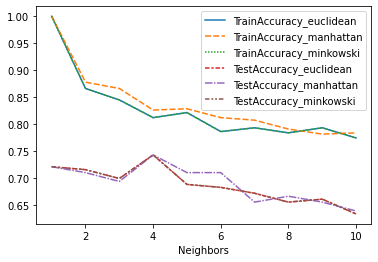

In [98]:
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index = "Neighbors", columns="Metric",
values = ["TrainAccuracy", "TestAccuracy"])
level0 = df_accuracy_metric_pivot.columns.get_level_values(0)
level1 = df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns = level0 + "_" + level1
sns.lineplot(data=df_accuracy_metric_pivot)

In [99]:
knn_model = KNeighborsClassifier(n_neighbors = 4, weights = 'uniform',metric = 'euclidean')
knn_model.fit(df_train_x, df_train_y)
y_pred = knn_model.predict(df_test_x)

print('train data accuracy : {0:.3f}'.format(knn_model.score(df_train_x, df_train_y)))

print('test data accuracy : {0:.3f}'.format(knn_model.score(df_test_x, df_test_y)))

print('Confusion matrix : \n{}'.format(confusion_matrix(df_test_y,y_pred)))

print(classification_report(df_test_y, y_pred,  digits = 3))

train data accuracy : 0.812
test data accuracy : 0.743
Confusion matrix : 
[[109  12]
 [ 35  27]]
              precision    recall  f1-score   support

           0      0.757     0.901     0.823       121
           1      0.692     0.435     0.535        62

    accuracy                          0.743       183
   macro avg      0.725     0.668     0.679       183
weighted avg      0.735     0.743     0.725       183



### KNN 분석 결과, 'train data accuracy' = 0.812, 'test data accuracy' = 0.743 의 값을 얻을 수 있다.

## SVM

In [100]:
# 데이터 구성 : Series, DataFrame
import pandas as pd
import numpy as np
# 데이터 시각화, 한글폰트
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', family = 'Malgun Gothic')

# scaling
from sklearn.preprocessing import StandardScaler
# data split
from sklearn.model_selection import train_test_split
# SVM
from sklearn.svm import SVC
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [101]:
# 데이터 불러오기
df_raw

,SCALE,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,SPEC_SIMPLE
0,0,T1,32.25,3707.0,15109,14180,1호기,1열,1144,116.0,1133,59.0,282,1125,934.0,1,8,AB
1,0,T1,32.25,3707.0,15109,14180,1호기,2열,1144,122.0,1135,53.0,283,1120,937.0,1,8,AB
2,0,T8,33.27,3619.0,19181,18130,2호기,1열,1129,116.0,1121,55.0,282,1106,889.0,1,8,NV
3,0,T8,33.27,3619.0,19181,18130,2호기,2열,1152,125.0,1127,68.0,316,1113,885.0,1,8,NV
4,0,T8,38.33,3098.0,13334,12430,3호기,1열,1140,134.0,1128,48.0,314,1118,873.0,1,8,BV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,1,C0,20.14,3580.0,38639,21870,3호기,1열,1172,72.0,1164,62.0,245,1155,1005.0,1,8,NK
716,0,C0,15.08,3212.0,48233,18340,2호기,1열,1150,61.0,1169,61.0,238,1160,947.0,1,10,NV
717,0,C0,16.60,3441.0,43688,19590,2호기,2열,1169,65.0,1163,77.0,247,1152,948.0,1,10,NV
718,0,C0,15.59,3363.0,48740,80240,3호기,2열,1179,86.0,1163,45.0,243,1154,940.0,1,10,LR


In [102]:
# 더미변수 생성
df_raw_dummy

,SCALE,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,...,SPEC_SIMPLE_GL,SPEC_SIMPLE_JS,SPEC_SIMPLE_KR,SPEC_SIMPLE_KS,SPEC_SIMPLE_LR,SPEC_SIMPLE_NK,SPEC_SIMPLE_NV,SPEC_SIMPLE_PI,SPEC_SIMPLE_SA,SPEC_SIMPLE_V4
0,0,32.25,3707.0,15109,14180,1144,116.0,1133,59.0,282,...,0,0,0,0,0,0,0,0,0,0
1,0,32.25,3707.0,15109,14180,1144,122.0,1135,53.0,283,...,0,0,0,0,0,0,0,0,0,0
2,0,33.27,3619.0,19181,18130,1129,116.0,1121,55.0,282,...,0,0,0,0,0,0,1,0,0,0
3,0,33.27,3619.0,19181,18130,1152,125.0,1127,68.0,316,...,0,0,0,0,0,0,1,0,0,0
4,0,38.33,3098.0,13334,12430,1140,134.0,1128,48.0,314,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,1,20.14,3580.0,38639,21870,1172,72.0,1164,62.0,245,...,0,0,0,0,0,1,0,0,0,0
716,0,15.08,3212.0,48233,18340,1150,61.0,1169,61.0,238,...,0,0,0,0,0,0,1,0,0,0
717,0,16.60,3441.0,43688,19590,1169,65.0,1163,77.0,247,...,0,0,0,0,0,0,1,0,0,0
718,0,15.59,3363.0,48740,80240,1179,86.0,1163,45.0,243,...,0,0,0,0,1,0,0,0,0,0


In [103]:
# 데이터 구성하기 - 데이터 분할
# 설명변수, 목표변수 데이터 구분
df_raw_x = df_raw_dummy.drop('SCALE', axis=1 ,inplace=False)
df_raw_y = df_raw_dummy['SCALE']

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    df_raw_x, df_raw_y, test_size=0.3, random_state=1234)

print('분할 전 설명변수 데이터:', df_raw_x.shape)
print('분할 후 설명변수 데이터:Train', df_train_x.shape, 'Test',df_test_x.shape)

분할 전 설명변수 데이터: (609, 44)
분할 후 설명변수 데이터:Train (426, 44) Test (183, 44)


In [104]:
# SVC 모델 생성 - 기본 옵션으로 모델 생성
svm_uncustomized = SVC(random_state = 1234)
svm_uncustomized.fit(df_train_x, df_train_y)
# train 데이터 셋 정확도
print('Accuracy on training set: {:.3f}'.format(svm_uncustomized.score(df_train_x, df_train_y)))
# test데이터 정확도
print('Accuracy on test set: {:.3f}'.format(svm_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.681
Accuracy on test set: 0.661


In [105]:
# SVC 모델 Parameter 변경 - C: 규제에 대한 강도 변경

# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# c: 규제 (0.01, 0.1, 1 ,10)
para_c = [10 **c for c in range(-2,2)]
# para_c = [0.1 *c for c in range(1,10)] # C 변화 구간 변경

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

In [106]:
# C별 정확도 테이블
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.01,0.681,0.661
1,0.10,0.681,0.661
2,1.00,0.681,0.661
3,10.00,0.683,0.667


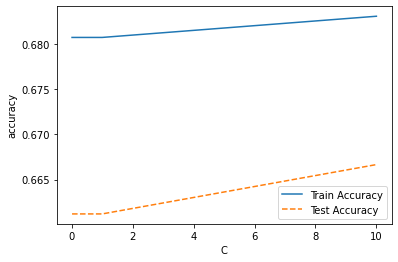

In [107]:
# 모델 정확도 그래프 확인
plt.plot(para_c, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_c, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('C')
plt.legend()

In [108]:
# C가 1.0 이상이면 train 데이터 이용한 모델의 정확도는 거의 변화 없음,test 정확도는 상승
# C가 1.0 이상 변화 시 정확도 확인 필요

In [109]:
# SVC 모델 Parameter 변경 - Gamma : 훈련 샘플이 미치는 영향의 범위를 변경

# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# gamma: 규제 (0.01, 0.1, 1 ,10)
para_gamma = [10 **gamma for gamma in range(-2,2)]

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = 0.1, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

In [110]:
# Gamma별 정확도 테이블
df_accuracy_gamma.round(4)

,gamma,TrainAccuracy,TestAccuracy
0,0.01,0.6808,0.6612
1,0.10,0.6808,0.6612
2,1.00,0.6808,0.6612
3,10.00,0.6808,0.6612


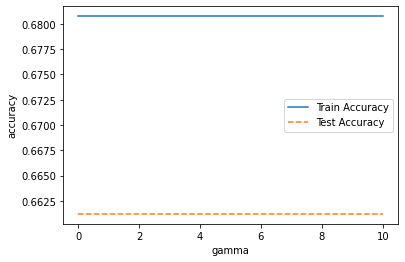

In [111]:
# 모델 정확도 그래프 확인
plt.plot(para_gamma, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_gamma, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('gamma')
plt.legend()

In [112]:
# gamma 변화는 정확도에 영향을 미치지 않음
# gamma 변화 구간을 변경하여 정확도 확인 가능
# 임의로 지정
gamma = 0.1

In [113]:
# scale 변환 - Standardscaler : 설명변수 값의 구간을 동일하게

# 변수명 저장
v_feature_name = df_train_x.columns
# StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,...,SPEC_SIMPLE_GL,SPEC_SIMPLE_JS,SPEC_SIMPLE_KR,SPEC_SIMPLE_KS,SPEC_SIMPLE_LR,SPEC_SIMPLE_NK,SPEC_SIMPLE_NV,SPEC_SIMPLE_PI,SPEC_SIMPLE_SA,SPEC_SIMPLE_V4
0,0.266002,1.892738,-1.502921,-1.130411,-0.601726,1.482387,-1.068452,-0.617286,-0.279515,-0.935778,...,-0.292509,-0.531136,-0.198114,-0.193594,-0.405507,-0.179453,-0.416426,-0.202548,-0.188982,-0.081312
1,0.266002,1.892738,-1.502921,-1.130411,-0.601726,1.736725,-0.951831,-0.925971,-0.257111,-1.223776,...,-0.292509,-0.531136,-0.198114,-0.193594,-0.405507,-0.179453,-0.416426,-0.202548,-0.188982,-0.081312
2,0.325539,1.710274,-1.196241,-0.972711,-1.318853,1.482387,-1.768179,-0.823076,-0.279515,-2.030168,...,-0.292509,-0.531136,-0.198114,-0.193594,-0.405507,-0.179453,2.401388,-0.202548,-0.188982,-0.081312
3,0.325539,1.710274,-1.196241,-0.972711,-0.219259,1.863894,-1.418316,-0.154258,0.482217,-1.626972,...,-0.292509,-0.531136,-0.198114,-0.193594,-0.405507,-0.179453,2.401388,-0.202548,-0.188982,-0.081312
4,0.620892,0.630008,-1.636604,-1.200277,-0.792960,2.245401,-1.360005,-1.183209,0.437409,-1.338975,...,-0.292509,-0.531136,-0.198114,-0.193594,-0.405507,-0.179453,-0.416426,-0.202548,-0.188982,-0.081312


In [114]:
# 데이터 분할
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.3, random_state= 1234)
print("train data X size: {}".format(df_scaled_train_x.shape))
print("test data X size: {}".format(df_scaled_test_x.shape))

train data X size: (426, 44)
test data X size: (183, 44)


In [115]:
# scale 조절 후 SVC 모델 재실행 - scale이 조정된 데이터로 새로운 모델 생성

svm_scaled = SVC(random_state= 1234)
svm_scaled.fit(df_scaled_train_x, df_train_y)
# train 데이터 셋 정확도
print('Accuracy on training set: {:.3f}'.format(svm_scaled.score(df_scaled_train_x, df_train_y)))
# test 데이터 셋 정확도
print('Accuracy on test set: {:.3f}'.format(svm_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on training set: 0.915
Accuracy on test set: 0.809


In [116]:
# 새로운 SVC 모델 Parameter 변경 - C: 규제에 대한 강도 변경

# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# c: 규제 (0.01, 0.1, 1 ,10)
para_c = [10 **c for c in range(-2,2)]
# para_c = [0.1 *c for c in range(1,10)] # C 변화 구간 변경

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

In [117]:
# C별 정확도 테이블
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.01,0.681,0.661
1,0.10,0.751,0.721
2,1.00,0.915,0.809
3,10.00,0.967,0.825


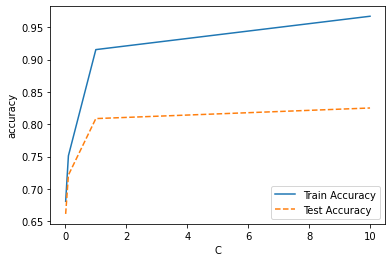

In [118]:
# 모델 정확도 그래프 확인
plt.plot(para_c, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_c, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('C')
plt.legend()

In [119]:
# C가 1일 때 모델의 정확도가 많이 증가함
# 필요시 C 변화 구간을 0.1 ~ 1.0 변경하여 정확도 확인 가능
# 임의로 지정
C = 1

In [120]:
# 새로운 SVC 모델 Parameter 변경 - Gamma: 훈련 샘플이 미치는 영향의 범위를 변경 결과

# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# gamma: 규제 (0.01, 0.1, 1 ,10)
para_gamma = [10 **gamma for gamma in range(-2,2)]

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = 1, random_state = 1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

In [121]:
# Gamma별 정확도 테이블
df_accuracy_gamma.round(3)

,gamma,TrainAccuracy,TestAccuracy
0,0.01,0.890,0.836
1,0.10,0.958,0.770
2,1.00,1.000,0.689
3,10.00,1.000,0.661


In [122]:
# gamma가 1 이상이면 train 데이터의 모델은 과대적합
# gamma 변화 구간을 변경하여 정확도 확인 가능
# 임의로 지정
gamma = 0.1

In [123]:
# 결론 도출 - 최종 모델 선택

svc_final = SVC(gamma = 0.1, C = 1, random_state= 1234)
svc_final.fit(df_scaled_train_x, df_train_y)
y_pred = svc_final.predict(df_scaled_test_x)
# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(svc_final.score(df_scaled_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(svc_final.score(df_scaled_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))
# 목표변수의 빈도 불귱형 : f1 score로 모델 평가
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy on training set: 0.958
Accuracy on test set: 0.770
Confusion matrix: 
[[110  11]
 [ 31  31]]
              precision    recall  f1-score   support

           0      0.780     0.909     0.840       121
           1      0.738     0.500     0.596        62

    accuracy                          0.770       183
   macro avg      0.759     0.705     0.718       183
weighted avg      0.766     0.770     0.757       183



In [124]:
# test 데이터 기준 정분류율은 77.0%
# "1" 기준 f1 score는 59.6% (precision은 73.8%이나 recall이 50.0%임)

In [125]:
# GridSearchCV를 이용한 최적 parameter 찾기

estimator = SVC(random_state=1234)
# 구하고자 하는 parameter와 범위
param_grid = {"C":para_c,
             "gamma":para_gamma}
# 정확도가 높은 최적 parameter 찾기
grid_rf = GridSearchCV(estimator, param_grid, scoring = "accuracy", n_jobs = -1)
grid_rf.fit(df_scaled_train_x, df_train_y)
print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))

best estimator model: 
SVC(C=10, gamma=0.01, random_state=1234)

best parameter: 
{'C': 10, 'gamma': 0.01}

best score: 
0.866


In [126]:
# GridSearch 결과 C=10, gamma=0.01일 때 모델의 정확도 가장 높음 (0.866)

### 최종 모델 선택 결과, test 데이터 기준 정분류율은 77.0% 이며, "1" 기준 f1 score는 59.6% 이다. (precision은 73.8%이나 recall이 50.0%임)
### GridSearch 결과 C=10, gamma=0.01일 때 모델의 정확도 가장 높음 (0.866)

## 의사결정 트리

In [127]:
# 데이터 구성
df_raw

,SCALE,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,SPEC_SIMPLE
0,0,T1,32.25,3707.0,15109,14180,1호기,1열,1144,116.0,1133,59.0,282,1125,934.0,1,8,AB
1,0,T1,32.25,3707.0,15109,14180,1호기,2열,1144,122.0,1135,53.0,283,1120,937.0,1,8,AB
2,0,T8,33.27,3619.0,19181,18130,2호기,1열,1129,116.0,1121,55.0,282,1106,889.0,1,8,NV
3,0,T8,33.27,3619.0,19181,18130,2호기,2열,1152,125.0,1127,68.0,316,1113,885.0,1,8,NV
4,0,T8,38.33,3098.0,13334,12430,3호기,1열,1140,134.0,1128,48.0,314,1118,873.0,1,8,BV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,1,C0,20.14,3580.0,38639,21870,3호기,1열,1172,72.0,1164,62.0,245,1155,1005.0,1,8,NK
716,0,C0,15.08,3212.0,48233,18340,2호기,1열,1150,61.0,1169,61.0,238,1160,947.0,1,10,NV
717,0,C0,16.60,3441.0,43688,19590,2호기,2열,1169,65.0,1163,77.0,247,1152,948.0,1,10,NV
718,0,C0,15.59,3363.0,48740,80240,3호기,2열,1179,86.0,1163,45.0,243,1154,940.0,1,10,LR


In [128]:
# 데이터 구성하기 - 데이터 분할
# 설명변수, 목표변수 데이터 구분
df_raw_x = df_raw_dummy.drop('SCALE', axis=1 ,inplace=False)
df_raw_y = df_raw_dummy['SCALE']

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    df_raw_x, df_raw_y, test_size=0.3, random_state=1234)

print('분할 전 설명변수 데이터:', df_raw_x.shape)
print('분할 후 설명변수 데이터:Train', df_train_x.shape, 'Test',df_test_x.shape)

분할 전 설명변수 데이터: (609, 44)
분할 후 설명변수 데이터:Train (426, 44) Test (183, 44)


SCALE
0        411
1        198
dtype: int64 

SCALE=1 비율 SCALE
False    0.674877
True     0.325123
dtype: float64


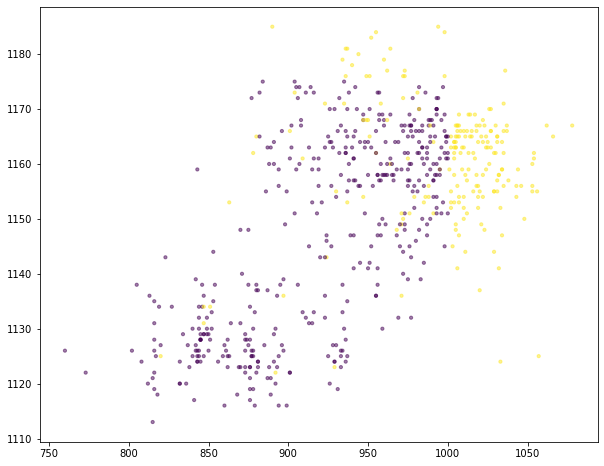

In [129]:
# Over-Sampling : SMOTE

# 목표변수 빈도 확인
print(df_raw.value_counts(['SCALE']),'\n')
print('SCALE=1 비율', df_raw.value_counts(df_raw['SCALE']==1)/len(df_raw))

# 목표변수 산점도 확인
plt.figure(figsize=(10,8))
plt.scatter(df_raw['ROLLING_TEMP_T5'],df_raw['FUR_SZ_TEMP'], c=df_raw['SCALE'],s=10,alpha=0.5)
plt.show()

In [130]:
#Over-sampling 설정
sm = SMOTE(sampling_strategy='auto')
# train 데이터를 이용한 Over-sampling
x_resampled, y_resampled = sm.fit_resample(df_train_x,df_train_y)
# 결과 확인
print('Over sampling 전:\n', df_train_y.value_counts(),'\n')
print('Over sampling 후 Train X: {}:'.format(x_resampled.shape))
print('Over sampling 후:Train X: {}:\n'.format(y_resampled.shape))
print('Over sampling 후 1: {}'.format(sum(y_resampled==1)))
print('Over sampling 후:0: {}'.format(sum(y_resampled==1)))

Over sampling 전:
 0    290
1    136
Name: SCALE, dtype: int64 

Over sampling 후 Train X: (580, 44):
Over sampling 후:Train X: (580,):

Over sampling 후 1: 290
Over sampling 후:0: 290


   PT_THICK  PT_WIDTH  PT_LENGTH  PT_WEIGHT  FUR_HZ_TEMP  FUR_HZ_TIME  \
0     30.23    1940.0      34797      16020         1119        130.0   
1     14.09    3284.0      51234      93050         1142         75.0   
2     44.39    2040.0      27501      39100         1113        124.0   
3     18.10    3094.0      41786      91850         1159        132.0   
4     18.10    3094.0      41786      91850         1146        108.0   

   FUR_SZ_TEMP  FUR_SZ_TIME  FUR_TIME  FUR_EXTEMP  ...  SPEC_SIMPLE_JS  \
0         1120         65.0       324        1112  ...               0   
1         1131        122.0       353        1125  ...               1   
2         1120         82.0       334        1113  ...               0   
3         1164         54.0       358        1155  ...               1   
4         1163         88.0       351        1148  ...               1   

   SPEC_SIMPLE_KR  SPEC_SIMPLE_KS  SPEC_SIMPLE_LR  SPEC_SIMPLE_NK  \
0               0               0              

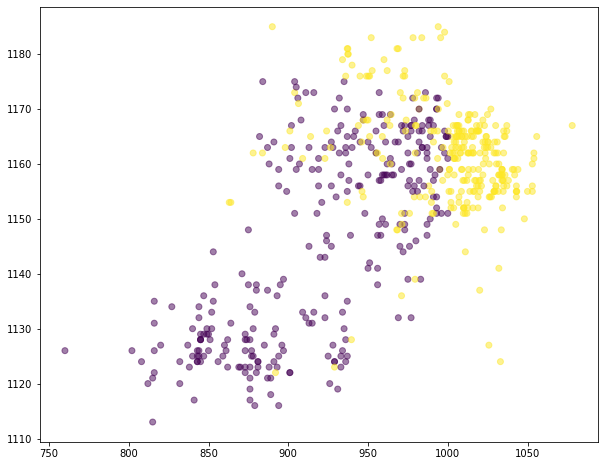

In [131]:
# 데이터 결합
df_resampled = pd.concat([x_resampled, y_resampled], axis=1)
print(df_resampled.head())
# 목표변수 산점도 확인
plt.figure(figsize=(10,8))
plt.scatter(df_resampled['ROLLING_TEMP_T5'], df_resampled['FUR_SZ_TEMP'],
           c=df_resampled['SCALE'], alpha=0.5)
plt.show()

In [132]:
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 정확도
print("Accuracy on training set :{:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 정확도
print("Accuracy on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set :1.000
Accuracy on test set: 0.973


In [133]:
tree_uncustomized

DecisionTreeClassifier(random_state=1234)

In [134]:
# train 및 test 정확도 결과 저장요
train_accuracy = []
test_accuracy = []
# max_depth : 최대 깊이 변경
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(random_state=1234,
                                max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))

# 데이터 테이블로 저장    
df_score_depth = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainAccuracy'] = train_accuracy
df_score_depth['TestAccuracy'] = test_accuracy
# 모델 정확도 확인
df_score_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.894,0.885
1,2,0.932,0.929
2,3,0.967,0.951
3,4,0.969,0.951
4,5,0.972,0.967
5,6,0.972,0.967
6,7,0.972,0.967
7,8,0.993,0.989
8,9,0.995,0.973
9,10,0.995,0.973


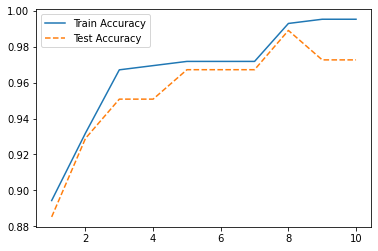

In [135]:
# 모델 정확도에 대한 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_depth, test_accuracy, linestyle='--', label='Test Accuracy')
plt.legend();

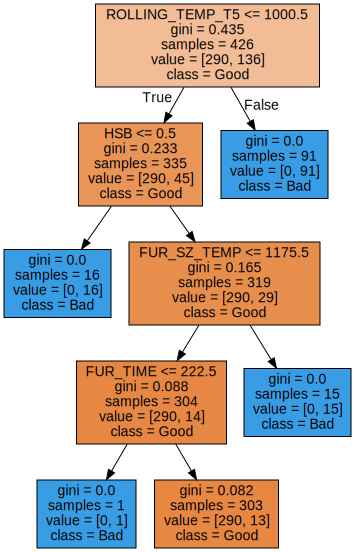

In [136]:
# 변수명 저장
v_feature_name = df_train_x.columns
# 깊이가 4인 모델
tree_low = DecisionTreeClassifier(random_state=1234,
                                max_depth = 4)
tree_low.fit(df_train_x, df_train_y)
# 트리 모델을 tree_low.dot 파일로 저장. (목표변수, 0:GOOD, 1:BAD)
export_graphviz(tree_low, out_file='tree_low.dot',
               class_names = ['Good', 'Bad'],feature_names=v_feature_name,
                impurity=True,filled=True)
# graphviz를 이용해 트리 모델 시각화
with open('tree_low.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

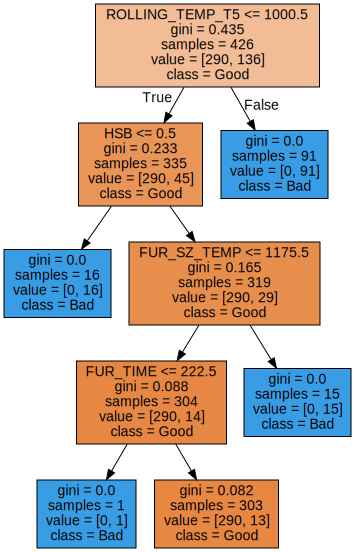

In [137]:
# 깊이가 6인 모델
tree_high = DecisionTreeClassifier(random_state=1234,
                                max_depth = 6)
tree_high.fit(df_train_x, df_train_y)
export_graphviz(tree_low, out_file='tree_high.dot',
               class_names = ['Good', 'Bad'],feature_names=v_feature_name,
                impurity=True,filled=True)
with open('tree_high.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [138]:
# train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy = []
# min_samples_split : 분할하기 위한 노드의 최소 샘플 수
para_split = [n_split*10 for n_split in range(1,11)]

for v_min_split in para_split:
    tree = DecisionTreeClassifier(random_state=1234,
                                max_depth = 4,
                                 min_samples_split=v_min_split)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))

# 데이터 테이블로 저장    
df_accuracy_split = pd.DataFrame()
df_accuracy_split['MinSamplesSplit'] = para_split
df_accuracy_split['TrainAccuracy'] = train_accuracy
df_accuracy_split['TestAccuracy'] = test_accuracy
# 모델 정확도 확인
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.969,0.951
1,20,0.969,0.951
2,30,0.969,0.951
3,40,0.969,0.951
4,50,0.969,0.951
5,60,0.969,0.951
6,70,0.969,0.951
7,80,0.969,0.951
8,90,0.969,0.951
9,100,0.969,0.951


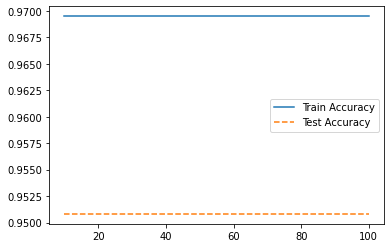

In [139]:
# 모델 정확도 확인
plt.plot(para_split, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_split, test_accuracy, linestyle='--', label='Test Accuracy')
plt.legend();

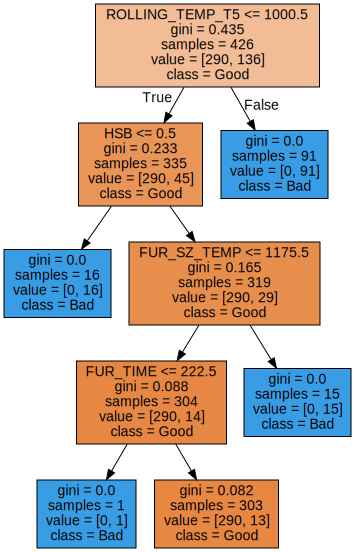

In [140]:
# 분리 노드의 최소 자료 수가 20인 모델
v_feature_name = df_train_x.columns

tree_low = DecisionTreeClassifier(random_state=1234,
                                max_depth = 4,
                                 min_samples_split=20)
tree_low.fit(df_train_x, df_train_y)
export_graphviz(tree_low, out_file='tree_low.dot',
               class_names = ['Good', 'Bad'],feature_names=v_feature_name,
                impurity=True,filled=True)
with open('tree_low.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

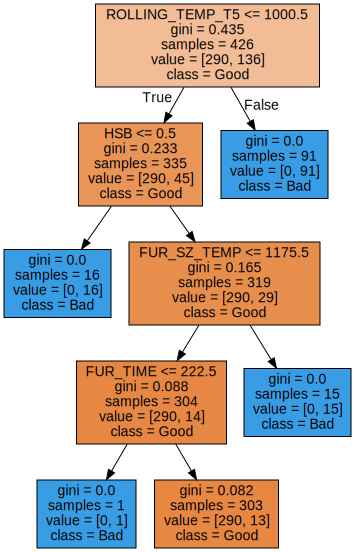

In [141]:
# 분리 노드의 최소 자료 수가 30인 모델
tree_high = DecisionTreeClassifier(random_state=1234,
                                max_depth = 4,
                                 min_samples_split=30)
tree_high.fit(df_train_x, df_train_y)
export_graphviz(tree_low, out_file='tree_high.dot',
               class_names = ['Good', 'Bad'],feature_names=v_feature_name,
                impurity=True,filled=True)
with open('tree_high.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [142]:
# train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy = []

# min_samples_leaf: 잎사귀 노드 최소 자료 수 제한
para_leaf = [n_split*2 for n_split in range(1,11)]

for v_min_leaf in para_leaf:
    tree = DecisionTreeClassifier(random_state=1234,
                                max_depth = 4,
                                 min_samples_split=20,
                                 min_samples_leaf = v_min_leaf)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))

# 데이터 테이블로 저장    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf'] = para_leaf
df_accuracy_leaf['TrainAccuracy'] = train_accuracy
df_accuracy_leaf['TestAccuracy'] = test_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,2,0.967,0.951
1,4,0.967,0.951
2,6,0.967,0.951
3,8,0.967,0.951
4,10,0.967,0.951
5,12,0.967,0.951
6,14,0.967,0.951
7,16,0.960,0.951
8,18,0.925,0.907
9,20,0.923,0.880


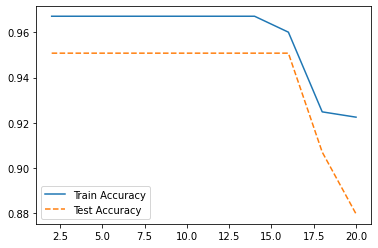

In [143]:
# 모델 정확도 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_leaf, test_accuracy, linestyle='--', label='Test Accuracy')
plt.legend();

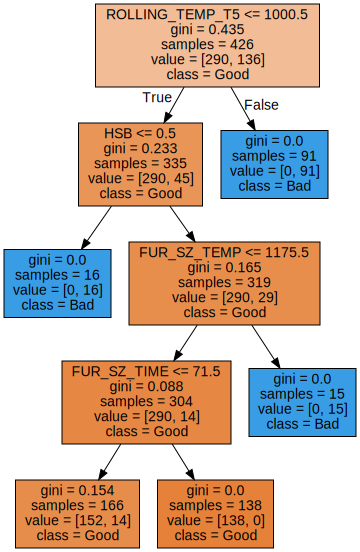

In [144]:
# 잎사귀의 최소 자료 수가 8인 모델
v_feature_name = df_train_x.columns

tree_low = DecisionTreeClassifier(random_state=1234,
                                max_depth = 4,
                                 min_samples_split=20,
                                  min_samples_leaf=8)
tree_low.fit(df_train_x, df_train_y)
export_graphviz(tree_low, out_file='tree_low.dot',
               class_names = ['Good', 'Bad'],feature_names=v_feature_name,
                impurity=True,filled=True)
with open('tree_low.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

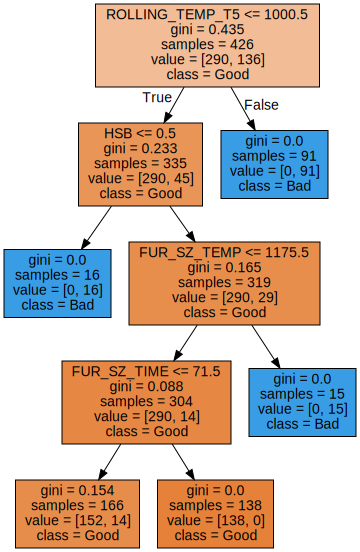

In [145]:
# 잎사귀의 최소 자료 수가
tree_high = DecisionTreeClassifier(random_state=1234,
                                max_depth = 4,
                                 min_samples_split=20,
                                  min_samples_leaf=10)
tree_high.fit(df_train_x, df_train_y)

export_graphviz(tree_high, out_file='tree_high.dot',
               class_names = ['Good', 'Bad'],feature_names=v_feature_name,
                impurity=True,filled=True)
with open('tree_high.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [146]:
# 최종 모델 선정
tree_final= DecisionTreeClassifier(random_state=1234,min_samples_leaf=8, min_samples_split=20, max_depth = 4)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=8, min_samples_split=20,
                       random_state=1234)

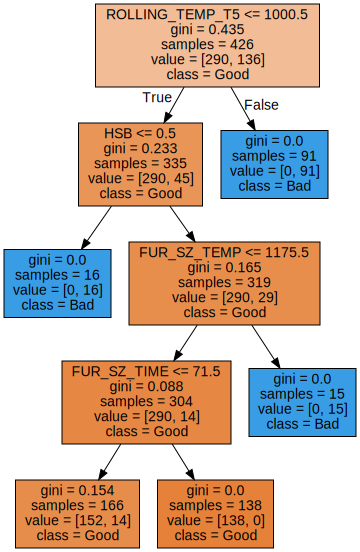

In [147]:
# 최종 모델 시각화
# tree_final.dot으로 결과 저장
export_graphviz(tree_final, out_file='tree_final.dot', class_names = ['Good', 'Bad'],
               feature_names = v_feature_name,impurity=True,filled=True)
# tree_final.dot 그리기
with open('tree_final.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [148]:
# 평가
y_pred =tree_final.predict(df_test_x)
print('Accuracy: {0:.3f}\n'.format(tree_final.score(df_test_x, df_test_y)))
print('Confusion matrix: \n{}'.format(confusion_matrix(df_test_y, df_test_y)))
# 목표변수의 빈도 불균형 : f1 score로 모델 평가
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy: 0.951

Confusion matrix: 
[[121   0]
 [  0  62]]
              precision    recall  f1-score   support

           0      0.931     1.000     0.964       121
           1      1.000     0.855     0.922        62

    accuracy                          0.951       183
   macro avg      0.965     0.927     0.943       183
weighted avg      0.954     0.951     0.950       183



In [149]:
# tree.feature_importance_ 로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values('Importance',ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
10,ROLLING_TEMP_T5,0.672
6,FUR_SZ_TEMP,0.163
11,HSB,0.158
7,FUR_SZ_TIME,0.007
0,PT_THICK,0.000
34,SPEC_SIMPLE_GL,0.000
26,FUR_NO_ROW_2열,0.000
27,SPEC_SIMPLE_A2,0.000
28,SPEC_SIMPLE_A5,0.000
29,SPEC_SIMPLE_A7,0.000


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_

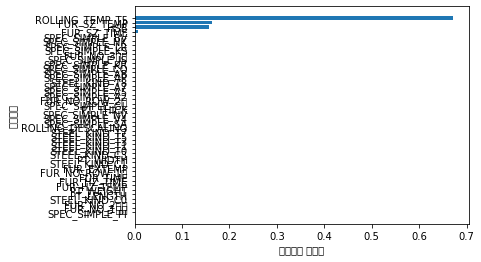

In [150]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values('Importance',ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates,df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수');

### 중요 설명변수 : 압연온도(ROLLING_TEMP_T5). 가열로 균열대 시간(FUR_SZ_TEMP), 고열의 스케일 브레이커(HSB) 순으로 영향이 크다고 해석할 수 있음
### 단, 계산된 변수 중요도 값이 낮거나 0이더라도 선택되는 데이터에 따라 중요도가 변경될 수 있음. 